### Table of Contents

* **[1. Import Data](#import)<br>**
    * [1.1. Import Libraries](#libs)<br>
    * [1.2. Import Dataset](#dataset)<br>
    * [1.3. Check/Drop Duplicates](#duplicates)<br>
* **[2. Explore Dataset](#explore)<br>**
    * [2.1. Basic Exploration](#basic)<br>
    * [2.2. Statistical Descriptive Exploration](#stats)<br>
    * [2.3. Initial Visual Exploration of Dataset](#ini_visual)<br>
* **[3. Data Cleaning and Transformation](#transform)<br>**
    * [3.1. Detect/Drop Outliers](#outliers)<br>
    * [3.2. Define Dataset Index (ReviewID)](#index)<br>
    * [3.3. Replace Wrong Observations](#wrong)<br>
    * [3.4. Delete observations with Year Birth > 2006](#Year)<br>
    * [3.5. Creating new variables: Gender | Age | Average](#variables)<br>
    * [3.6. Creating Dummy Variable DataFrame](#dummy)<br>
    * [3.7. Filling Missing Values of Age with KNN Inputer](#inputer)<br>
* **[4. Visual Exploration](#visual)<br>**
* **[5. Clustering](#clustering)<br>**
    * [5.1. Clustering df_reviews](#reviews)<br>
        * [5.1.1. Kmeans - K = 3 clusters](#rev_3k)<br>
        * [5.1.2. Explore how these clusters impact the distribution of our dataset](#rev_explore)<br>
    * [5.2.  Clustering df_customers](#customers)<br>
        * [5.2.1. Kmeans - K = 4 clusters](#cust_4k)<br>
        * [5.2.2. Explore how these clusters impact the distribution of our dataset](#cust_explore)<br>
    * [5.3. Concatenate the new cluster in our new df_clustered](#concat)<br>
        * [5.3.1. First concatenate the new clusters](#concat_cluster)<br>
        * [5.3.2. Explore the obtained final clusters](#concat_explore)<br>
* **[6. Final Exploration | Insights](#insights)<br>**
    * [6.1. Explore Cluster 00](#cluster_00)<br>
    * [6.2. Explore Cluster 02](#cluster_02)<br>
    * [6.3. Explore Cluster 10](#cluster_10)<br>
    * [6.4. Explore Cluster 12](#cluster_12)<br>


--------------------------------------------------------------------------------------------------------------------------------

<a id='import'></a>

## 1. Import Data

<a id='libs'></a>
### 1.1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from datetime import date
import os

<a id='dataset'></a>
### 1.2. Import Dataset

In [4]:
df = pd.read_csv('cluster.csv')
df.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


<a id='duplicates'></a>
### 1.3. Check/Drop Duplicates

In [3]:
df[df.duplicated(keep = False)]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
8194,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
8195,nochurn,Ms. Abigail York,yes,1995.0,leisure,double,5098,5,5,5,...,4,5,5,3,3,4,3,3,3,5
9175,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9176,churn,Ms. Abigail Kennedy,yes,1991.0,business,suite,5932,3,3,2,...,3,3,3,3,4,1,4,3,4,3
9416,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1
9417,nochurn,Ms. Abigail Buchanan,yes,1972.0,business,double,6769,5,4,4,...,5,5,4,5,5,5,5,2,5,1


In [4]:
df.drop_duplicates(inplace = True)

<a id='explore'></a>

## 2. Explore Dataset

<a id='basic'></a>
### 2.1. Basic Exploration

After the duplicate removal, our dataset consists of 15586 customer reviews (rows) and 21 features (columns)

In [5]:
df.shape

(15586, 21)

Checking the dataset columns

In [6]:
df.columns

Index(['Churn', 'Name', 'Longevity', 'Year_Birth', 'TypeTravel', 'RoomType',
       'RewardPoints', 'Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location',
       'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality',
       'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService'],
      dtype='object')

Generic information about our dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15586 non-null  object 
 1   Name               15586 non-null  object 
 2   Longevity          15586 non-null  object 
 3   Year_Birth         15391 non-null  float64
 4   TypeTravel         15586 non-null  object 
 5   RoomType           15586 non-null  object 
 6   RewardPoints       15586 non-null  int64  
 7   Comfort            15586 non-null  int64  
 8   ReceptionSchedule  15586 non-null  int64  
 9   FoodDrink          15586 non-null  int64  
 10  Location           15586 non-null  int64  
 11  Wifi               15586 non-null  int64  
 12  Amenities          15586 non-null  int64  
 13  Staff              15586 non-null  int64  
 14  OnlineBooking      15586 non-null  int64  
 15  PriceQuality       15586 non-null  int64  
 16  RoomSpace          155

   * 1 float variable
   * 5 object variables
   * 15 integer variables
   * 195 missing values on column Year_Birth

<a id='stats'></a>
### 2.2. Statistical Descriptive Exploration

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15391.0,1981.705607,15.179757,1936.0,1970.0,1981.0,1994.00,2014.0
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0
OnlineBooking,15586.0,3.454190,1.310401,0.0,2.0,4.0,5.00,5.0


**Brief analysis**:
  * Wifi column contains evaluations with value 6, and it should be between 0-5
  * Year_Birth has 195 missing values (as already noticed above)
  * Year_Birth max value is 2014 - represents an 8 year old client


Check skewness and kurtosis in our dataset

In [9]:
df.skew()

C:\Users\e349454\AppData\Local\Temp/ipykernel_13576/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Year_Birth          -0.003724
RewardPoints        -0.453744
Comfort             -0.100806
ReceptionSchedule   -0.260518
FoodDrink           -0.123543
Location            -0.050057
Wifi                -0.171105
Amenities           -0.599424
Staff               -0.554468
OnlineBooking       -0.472109
PriceQuality        -0.503290
RoomSpace           -0.482872
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.358340
dtype: float64

In [10]:
df.kurt()

C:\Users\e349454\AppData\Local\Temp/ipykernel_13576/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Year_Birth          -0.729844
RewardPoints         0.260162
Comfort             -0.935490
ReceptionSchedule   -1.077415
FoodDrink           -0.967006
Location            -1.076634
Wifi                -1.111382
Amenities           -0.540790
Staff               -0.859138
OnlineBooking       -0.931961
PriceQuality        -0.772889
RoomSpace           -0.864568
CheckOut            -0.225208
Checkin             -0.812148
Cleanliness         -0.225374
BarService          -0.949633
dtype: float64

   * There is some evidence of moderate skewness (between |0.5| and |1.0|) but none high skewness results
   * As for Kurtosis, all of the results are below 3, so we cannot conclude presence of outliers

Statistics of our categorical variables

In [11]:
df.describe(include = ['O'])

,Churn,Name,Longevity,TypeTravel,RoomType
count,15586,15586,15586,15586,15586
unique,2,14227,3,2,3
top,nochurn,Mr. Michael Smith,yes,business,single
freq,8475,9,12545,10754,7442


* About 45% of customers of our dataset have churned (important parameter for our analysis)
* About 70% of customers travelled on business
* About 80% of our dataset is related to long term clients (longevity = yes)

Checking the range/different values for the Longevity, TypeTravel and RoomType variables

In [12]:
df['Longevity'].value_counts()

yes    12545
no      2874
y        167
Name: Longevity, dtype: int64

In [13]:
df['TypeTravel'].value_counts()

business    10754
leisure      4832
Name: TypeTravel, dtype: int64

In [14]:
df['RoomType'].value_counts()

single    7442
double    7019
suite     1125
Name: RoomType, dtype: int64

   * An issue with Longevity values was identified: 167 'y' values. Assuming these values mean 'yes', further in the project we are replacing them in order to solve this issue

<a id='ini_visual'></a>
### 2.3. Initial Visual Exploration of Dataset

**Year of Birth distribution**

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

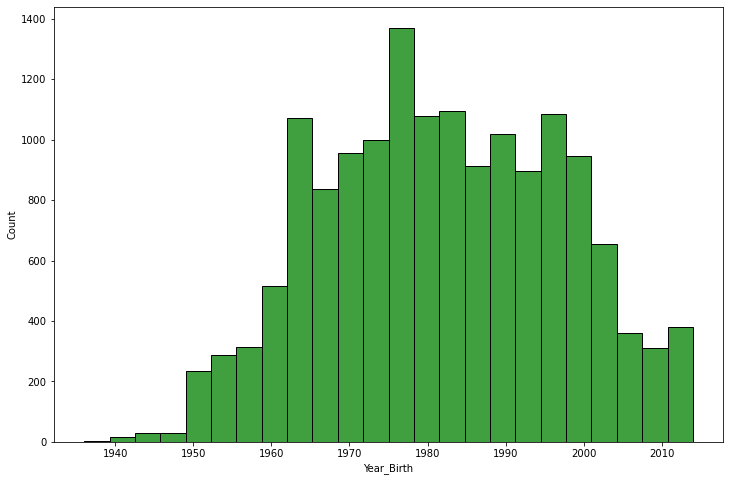

In [15]:
figure = plt.figure(figsize=(12,8))
sns.histplot(df['Year_Birth'], color="g", bins = 24)

**Brief Analysis:** <br>
   Besides the already identified 195 missing values of Year_Birth, and the maximum birth year of 2014:
   * Here it can be observed that there is a considerable amount of customers with age below 18 (birth year > 2004), which is not expected
   * Further in the project we will describe how we are dealing with this issue

**Correlation Matrix**

<AxesSubplot:>

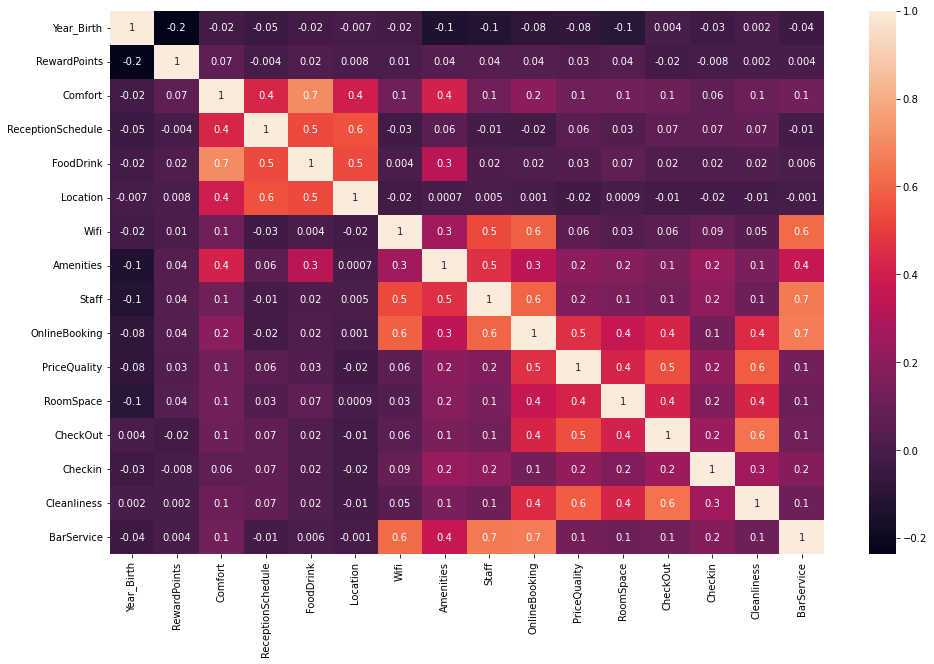

In [16]:
df_corr = df.corr(method = 'spearman') # new df that will represent the correlation between objects
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

   * There are no perfect correlations between variables
   *  We identified some groups of services with moderate correlations (between 0.4 and 0.7)   
   * From this correlation analysis, we conclude that all columns/variables must remain 

<a id='transform'></a>

## 3. Data Cleaning and Transformation 

<a id='outliers'></a>
### 3.1. Detecting/Dropping Outliers

Checking for possible outliers in Year_Birth and RewardPoints variables

<AxesSubplot:xlabel='RewardPoints'>

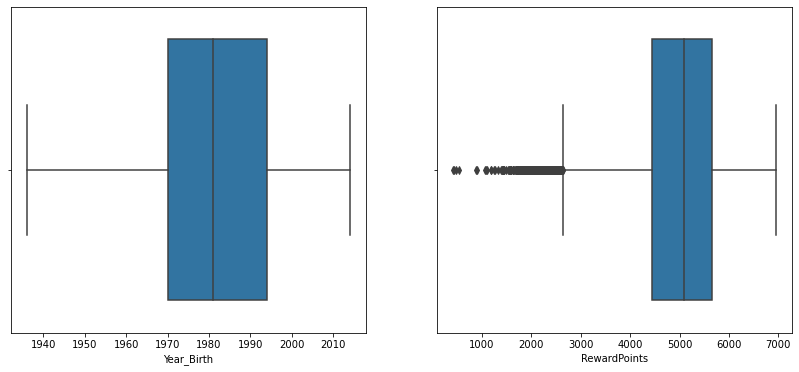

In [17]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = df, x = 'Year_Birth')
sns.boxplot(ax = axes[1], data = df, x = 'RewardPoints')

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

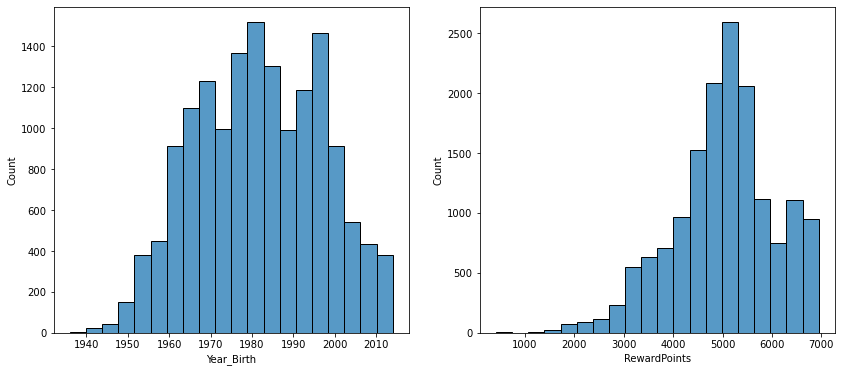

In [18]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = df, x = 'Year_Birth', bins = 20)
sns.histplot(ax = axes[1], data = df, x = 'RewardPoints', bins = 20)

* From the figures above, we conclude that RewardPoints < 1000 may represent outliers in our dataset

Check the amount of reviews with RewardPoints < 1000

In [20]:
df[df['RewardPoints'] < 1000]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
5779,nochurn,Ms. Kimberly Patterson,yes,1958.0,leisure,single,409,0,5,0,...,0,5,1,3,2,4,3,1,5,1
8158,churn,Mr. Alexander Wood,no,2013.0,business,double,901,2,2,2,...,2,4,4,3,4,3,4,4,2,4
9676,churn,Mr. Cody Silva,yes,1986.0,leisure,double,530,1,1,1,...,1,3,3,1,2,2,2,3,2,3
11434,nochurn,Ms. Hannah Jones,yes,1988.0,business,single,463,1,1,1,...,4,4,4,4,1,4,5,4,3,4
12151,nochurn,Mr. Stanley Miller,yes,1961.0,business,single,429,2,5,2,...,3,3,3,5,3,4,4,3,3,3
14528,nochurn,Ms. Kim Miller,yes,1995.0,business,single,874,2,2,2,...,4,4,4,3,5,4,4,4,5,4


* The total amount of reviews that verify this condition - 6 customer reviews - are << 3% of our dataset. 

Remove the observations where RewardPoints < 1000

In [21]:
df = df.drop(df[df['RewardPoints'] < 1000].index)

<a id='index'></a>
### 3.2. Define Dataset Index (ReviewID)

In [22]:
df.insert(0, 'ReviewID', range(0, len(df)))
df.set_index('ReviewID', inplace = True)
df.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
ReviewID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


<a id='wrong'></a>
### 3.3. Replace Wrong Observations

Replace Longevity observations 'y' with 'yes'

In [23]:
df['Longevity'] = df['Longevity'].replace('y','yes')
df['Longevity'].value_counts()

yes    12707
no      2873
Name: Longevity, dtype: int64

Replace Wifi observations from 6 to 5 

In [25]:
df['Wifi'] = df['Wifi'].replace(6,5) # Passar de 6 -> 5 (haviam 36 avaliações = 6)
df['Wifi'].value_counts()

4    3701
5    3481
3    3346
2    3244
1    1791
0      17
Name: Wifi, dtype: int64

<a id='Year'></a>
### 3.4. Delete observations with Year Birth > 2006

After a team discussion regarding the usage of Year Birth reviews with customer ages below 18 years old, we decided to perform the following process: 
   * Consider valid customer reviews with ages equal or above 16
   * Filter the customer reviews with ages below 16, and delete the Year Birth observations associated with those customers

After this procedure, we will have 1007 missing values of Year_Birth to fill (instead of the initial 195 missing values)

In [26]:
n_rows = len(df)
ano = df.Year_Birth

for i in range(0,n_rows): 
    if ano[i] > 2006:
        value = ano[i]
        df['Year_Birth'] = df['Year_Birth'].replace(value,np.NaN)
df.isna().sum()

Churn                   0
Name                    0
Longevity               0
Year_Birth           1007
TypeTravel              0
RoomType                0
RewardPoints            0
Comfort                 0
ReceptionSchedule       0
FoodDrink               0
Location                0
Wifi                    0
Amenities               0
Staff                   0
OnlineBooking           0
PriceQuality            0
RoomSpace               0
CheckOut                0
Checkin                 0
Cleanliness             0
BarService              0
dtype: int64

<a id='variables'></a>
### 3.5. Creating new variables: Gender | Age | Average

   * Gender -> search through the Mr. and Ms. designations in the Name column, and fill it with the corresponding M and F at the new Gender column
   * Age -> subtract the Year_Birth to current year
   * Average -> determine the mean value of all services evaluation, for each customer review.

In [27]:
reviews_columns = ['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']
df_review = df.loc[:, reviews_columns]
df['Average'] = df_review.mean(axis = 1)
df['Age'] = date.today().year - df['Year_Birth']
df['Gender'] = np.where(df['Name'].str[:3] == 'Mr.','M','F')

df

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,Gender
ReviewID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,3,3,3,3,4,3,4,3.285714,48.0,F
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,5,5,5,1,5,2,3.142857,57.0,M
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,3,3,2,3,2,3,1,2.714286,49.0,M
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,4,4,4,4,3,3.142857,29.0,F
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,3,4,1,3,5,3.571429,33.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,4,5,1,3,4,3,2.714286,34.0,F
15576,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,1,3,4,4,5,3.571429,22.0,F
15577,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,4,4,4,4,5,4,4,3.214286,58.0,M


In [28]:
df['Gender'].value_counts()


F    7979
M    7601
Name: Gender, dtype: int64

Now that we have the variable Age, we are removing the variable Year_Birth

In [29]:
df.drop('Year_Birth', axis = 1, inplace = True) 

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RewardPoints,15580.0,5024.121309,1024.460653,1066.000000,4446.000000,5088.000000,5649.000000,6950.0
Comfort,15580.0,2.841913,1.388416,0.000000,2.000000,3.000000,4.000000,5.0
ReceptionSchedule,15580.0,2.997176,1.518947,0.000000,2.000000,3.000000,4.000000,5.0
FoodDrink,15580.0,2.844994,1.436833,0.000000,2.000000,3.000000,4.000000,5.0
Location,15580.0,2.986136,1.299518,1.000000,2.000000,3.000000,4.000000,5.0
Wifi,15580.0,3.243004,1.322942,0.000000,2.000000,3.000000,4.000000,5.0
Amenities,15580.0,3.374454,1.352582,0.000000,2.000000,4.000000,4.000000,5.0
Staff,15580.0,3.506418,1.319696,1.000000,3.000000,4.000000,5.000000,5.0
OnlineBooking,15580.0,3.454300,1.310425,0.000000,2.000000,4.000000,5.000000,5.0
PriceQuality,15580.0,3.459820,1.268090,1.000000,3.000000,4.000000,4.000000,5.0


<a id='dummy'></a>
### 3.6. Creating Dummy Variable DataFrame

In [31]:
df_noname = df.copy()
df_noname = df_noname.drop('Name', axis = 1)

df_dummies = pd.get_dummies(df_noname, drop_first = True)
df_dummies

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,...,Cleanliness,BarService,Average,Age,Churn_nochurn,Longevity_yes,TypeTravel_leisure,RoomType_single,RoomType_suite,Gender_M
ReviewID,,,,,,,,,,,,,,,,,,,,,
0,4907,3,4,1,4,4,3,4,3,3,...,3,4,3.285714,48.0,0,1,0,1,0,0
1,6724,1,1,1,1,5,3,4,5,5,...,5,2,3.142857,57.0,1,1,0,1,0,1
2,4365,3,3,3,3,1,4,4,3,3,...,3,1,2.714286,49.0,0,1,0,1,0,1
3,3849,1,1,1,1,4,4,5,4,4,...,4,3,3.142857,29.0,1,1,1,0,0,0
4,5376,2,2,3,2,5,5,5,5,5,...,3,5,3.571429,33.0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,4968,2,0,2,2,3,2,4,3,4,...,4,3,2.714286,34.0,0,0,0,0,0,0
15576,4970,3,3,3,3,5,3,5,5,3,...,4,5,3.571429,22.0,0,0,0,0,0,0
15577,4046,1,1,1,1,3,4,5,4,4,...,4,4,3.214286,58.0,1,1,0,1,0,1


In [32]:
scaled_df = df_dummies.to_numpy() # Create numpy array containing df_dummies information
scaler = preprocessing.MinMaxScaler().fit(scaled_df) # Preprocess min-max relations of each attribute
scaled_df = MinMaxScaler().fit_transform(scaled_df) # Transform df_dummies into scaled_df 

# Switch from NumPy array to Pandas DataFrame 
cols = df_dummies.columns
scaled_df = pd.DataFrame(scaled_df, columns = cols)
scaled_df

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,...,Cleanliness,BarService,Average,Age,Churn_nochurn,Longevity_yes,TypeTravel_leisure,RoomType_single,RoomType_suite,Gender_M
0,0.652787,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,...,0.50,0.8,0.555556,0.457143,0.0,1.0,0.0,1.0,0.0,0.0
1,0.961591,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,...,1.00,0.4,0.518519,0.585714,1.0,1.0,0.0,1.0,0.0,1.0
2,0.560673,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,...,0.50,0.2,0.407407,0.471429,0.0,1.0,0.0,1.0,0.0,1.0
3,0.472978,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,...,0.75,0.6,0.518519,0.185714,1.0,1.0,1.0,0.0,0.0,0.0
4,0.732495,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,...,0.50,1.0,0.629630,0.242857,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,0.663154,0.4,0.0,0.4,0.25,0.6,0.4,0.75,0.6,0.75,...,0.75,0.6,0.407407,0.257143,0.0,0.0,0.0,0.0,0.0,0.0
15576,0.663494,0.6,0.6,0.6,0.50,1.0,0.6,1.00,1.0,0.50,...,0.75,1.0,0.629630,0.085714,0.0,0.0,0.0,0.0,0.0,0.0
15577,0.506458,0.2,0.2,0.2,0.00,0.6,0.8,1.00,0.8,0.75,...,0.75,0.8,0.537037,0.600000,1.0,1.0,0.0,1.0,0.0,1.0
15578,0.694935,0.8,0.6,0.8,0.75,1.0,0.8,1.00,1.0,0.25,...,0.75,1.0,0.759259,0.200000,1.0,1.0,1.0,0.0,0.0,1.0


<a id='inputer'></a>
### 3.7. Filling Missing Values of Age with KNN Inputer

Using algorithm K-NN Inputer, perform the following steps:

   * Import from sklearn the KNN Inputer function
   * Create a new variable containing the columns to correlate - in this case we considered the whole dataset
   * Apply the algorithm
   * Replace the new Age values in our original dataset, and check for possible missing values to ensure its success


In [33]:
X = scaled_df # Input dataframe to Knn algorithm

imputer = KNNImputer(n_neighbors=10) # defining the number of neighbours
Xnew = imputer.fit_transform(X)     # Xnew will be the output of KNN Imputer

Xnew = pd.DataFrame(Xnew,columns=scaled_df.columns) # Transform Xnew in Pandas DataFrame

scaled_df.Age = Xnew.Age # Replace values in scaled_df
Xnew.isna().sum()

RewardPoints          0
Comfort               0
ReceptionSchedule     0
FoodDrink             0
Location              0
Wifi                  0
Amenities             0
Staff                 0
OnlineBooking         0
PriceQuality          0
RoomSpace             0
CheckOut              0
Checkin               0
Cleanliness           0
BarService            0
Average               0
Age                   0
Churn_nochurn         0
Longevity_yes         0
TypeTravel_leisure    0
RoomType_single       0
RoomType_suite        0
Gender_M              0
dtype: int64

   * All missing Age values were filled
   
In order to replace in the original dataframe, we will revert the scalling

In [34]:
Xfinal = scaler.inverse_transform(Xnew)
cols = df_dummies.columns
Xfinal = pd.DataFrame(Xfinal, columns = cols)

Replace the Age column in both dummies and original dataframe

In [35]:
df_dummies.Age = Xfinal.Age 
df_dummies['Age'] = df_dummies['Age'].round(decimals = 0)
df.Age = df_dummies.Age 


In [36]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,15580,2,nochurn,8471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,15580,14223,Mr. Michael Smith,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longevity,15580,2,yes,12707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeTravel,15580,2,business,10750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomType,15580,3,single,7438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RewardPoints,15580.0,NaN,NaN,NaN,5024.121309,1024.460653,1066.0,4446.0,5088.0,5649.0,6950.0
Comfort,15580.0,NaN,NaN,NaN,2.841913,1.388416,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,15580.0,NaN,NaN,NaN,2.997176,1.518947,0.0,2.0,3.0,4.0,5.0
FoodDrink,15580.0,NaN,NaN,NaN,2.844994,1.436833,0.0,2.0,3.0,4.0,5.0
Location,15580.0,NaN,NaN,NaN,2.986136,1.299518,1.0,2.0,3.0,4.0,5.0


<a id='visual'></a>

### 4. Visual Exploration

**Checking the distribution of all services reviews**

<AxesSubplot:xlabel='BarService', ylabel='Count'>

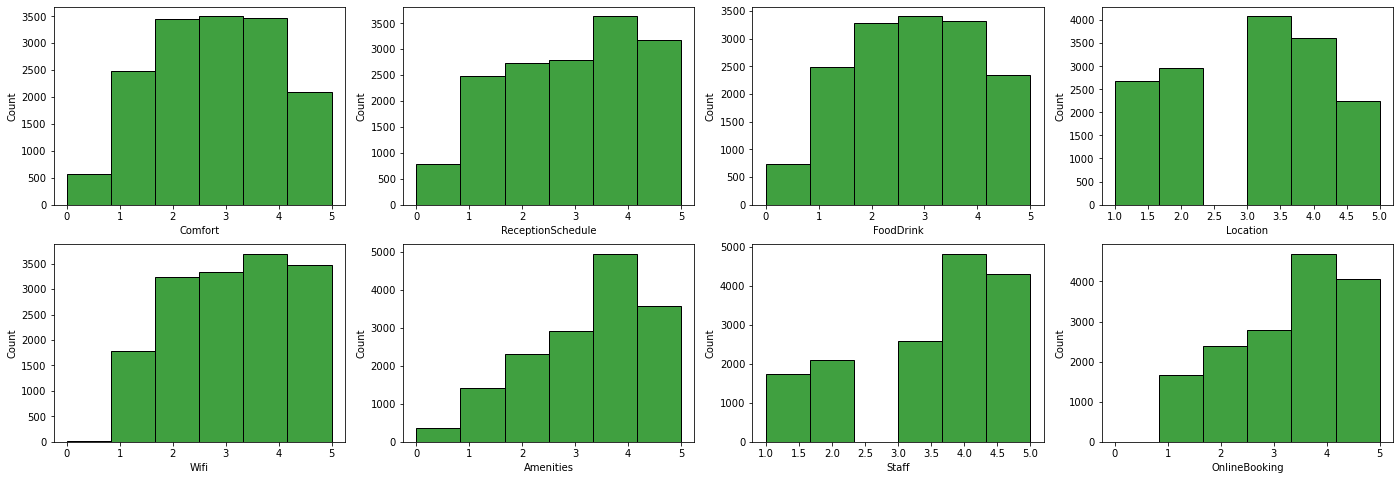

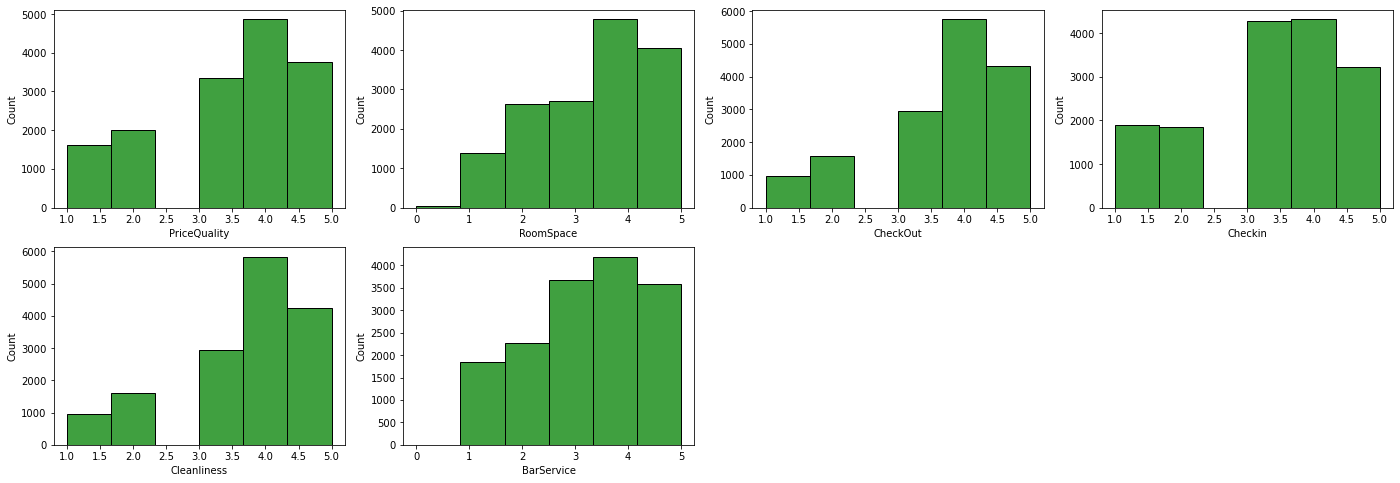

In [38]:
figure = plt.figure(figsize=(24,8))
ax = plt.subplot(241)
sns.histplot(df['Comfort'], color="g", bins = 6)
ax = plt.subplot(242)
sns.histplot(df['ReceptionSchedule'], color="g", bins = 6)
ax = plt.subplot(243)
sns.histplot(df['FoodDrink'], color="g", bins = 6)
ax = plt.subplot(244)
sns.histplot(df['Location'], color="g", bins = 6)
ax = plt.subplot(245)
sns.histplot(df['Wifi'], color="g", bins = 6)
ax = plt.subplot(246)
sns.histplot(df['Amenities'], color="g", bins = 6)
ax = plt.subplot(247)
sns.histplot(df['Staff'], color="g", bins = 6)
ax = plt.subplot(248)
sns.histplot(df['OnlineBooking'], color="g", bins = 6)

figure = plt.figure(figsize=(24,8))
ax = plt.subplot(241)
sns.histplot(df['PriceQuality'], color="g", bins = 6)
ax = plt.subplot(242)
sns.histplot(df['RoomSpace'], color="g", bins = 6)
ax = plt.subplot(243)
sns.histplot(df['CheckOut'], color="g", bins = 6)
ax = plt.subplot(244)
sns.histplot(df['Checkin'], color="g", bins = 6)       
ax = plt.subplot(245)
sns.histplot(df['Cleanliness'], color="g", bins = 6)            
ax = plt.subplot(246)
sns.histplot(df['BarService'], color="g", bins = 6)             
         

From a brief analysis of the reviews distributions, we can identify some services that may be related to loss of customers (Churn):
   * Comfort
   * FoodDrink
   * Wifi 
   * ReceptionSchedule
   * Location

Later on, by clustering our data we will have a better understanding of the services that actual impact our Churn rate

**Age distribution of our dataset (from 16 to 86 years old)**

<AxesSubplot:xlabel='Age', ylabel='Count'>

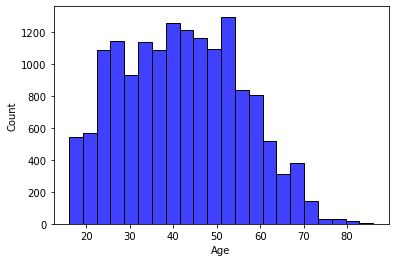

In [39]:
figure = plt.figure()
sns.histplot(df['Age'], color="b", bins = 22)

**Age distribution by Gender**

<AxesSubplot:xlabel='Age', ylabel='count'>

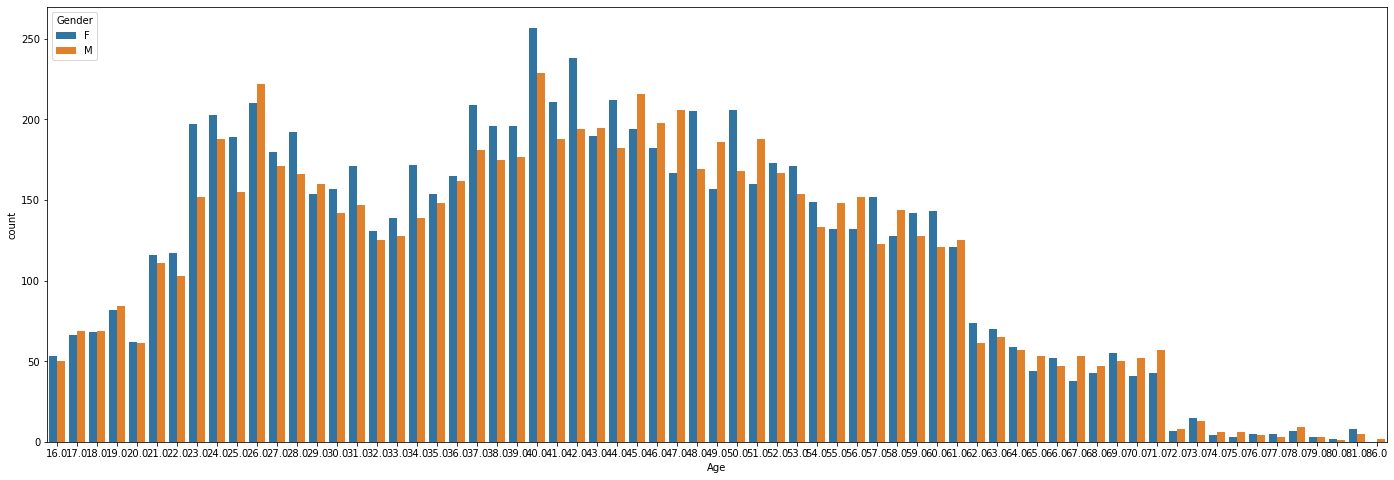

In [40]:
figure = plt.figure(figsize=(24,8))
sns.countplot(x = 'Age', hue = 'Gender', data = df)

**RewardPoints and Age distribution splitted by Gender**

<AxesSubplot:xlabel='Age', ylabel='RewardPoints'>

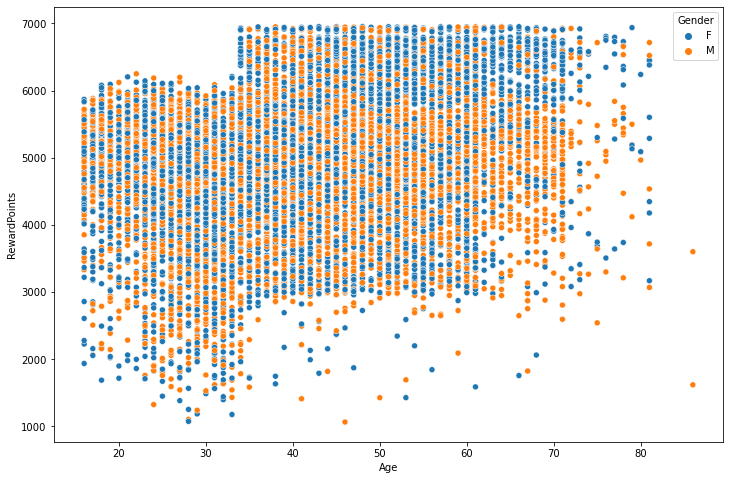

In [41]:
figure = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Age', y = 'RewardPoints', data = df, hue = 'Gender')

In general, we can observe that higher RewardPoints can be associated with older customers, an lower RewardPoints with younger customers.

**Age Distribution by TypeTravel**

<AxesSubplot:xlabel='Age', ylabel='count'>

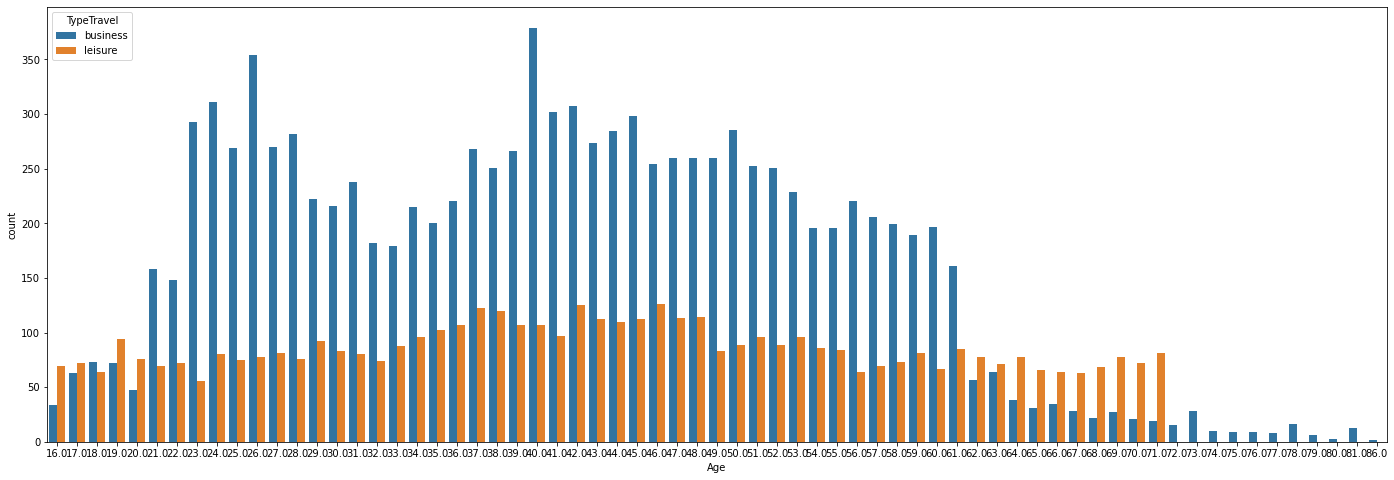

In [42]:
figure = plt.figure(figsize=(24,8))
sns.countplot(x = 'Age',hue = 'TypeTravel',data = df)

* We can observe that a huge portion of customers in our dataset uses our services for business travels.
* Also, high amount of business travels between the ages of 21 and 61
* In terms of leisure, the distribution is more or less even between the ages of 16 and 72

**Average Reviews versus Churn**

<AxesSubplot:xlabel='Average', ylabel='count'>

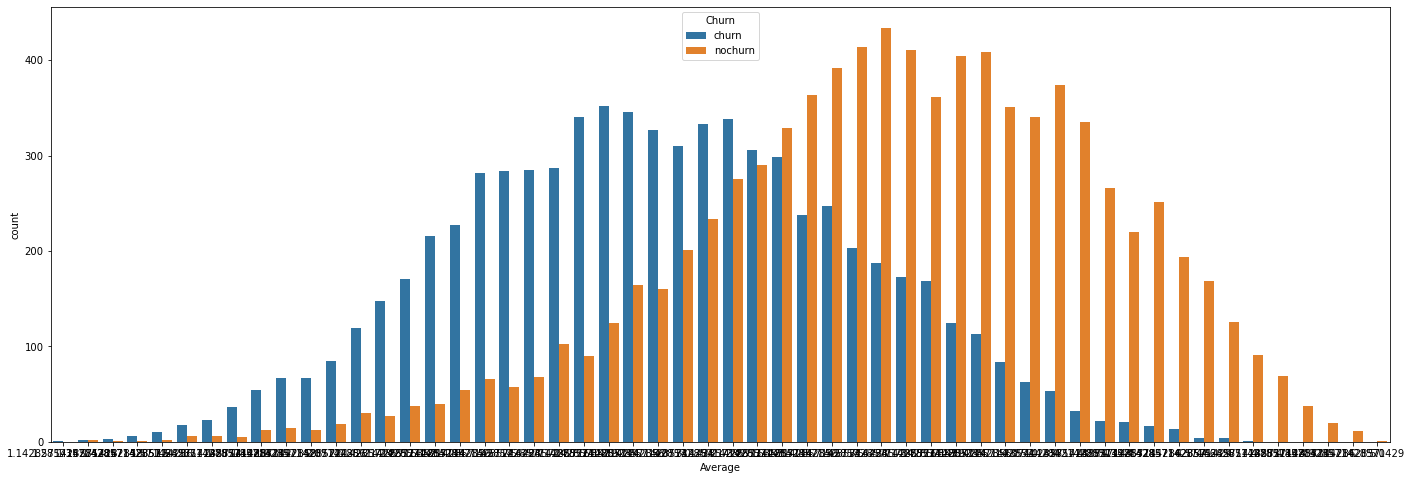

In [43]:
figure = plt.figure(figsize=(24,8))
sns.countplot(x = 'Average',hue = 'Churn', data = df)

* As expected, the Churn rate is highly associated with lower reviews
* Clustering our dataset will be an important step to highlight the main causes associated with churn (churn customers represent 45% of our dataset)

**Check some characteristics of long term and new customers**

churn      2184
nochurn     689
Name: Churn, dtype: int64

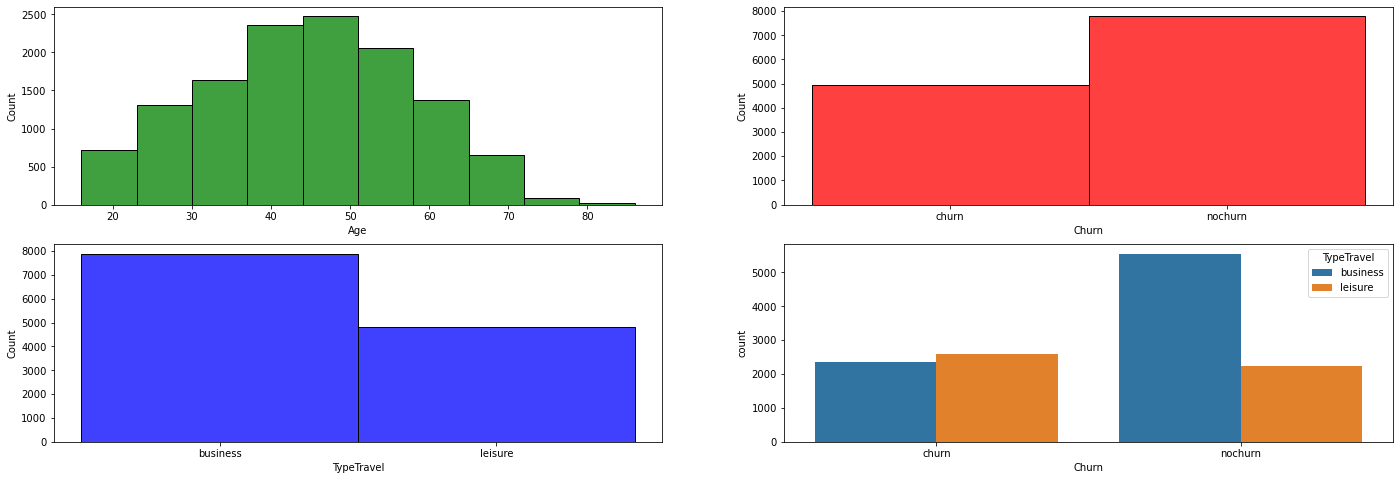

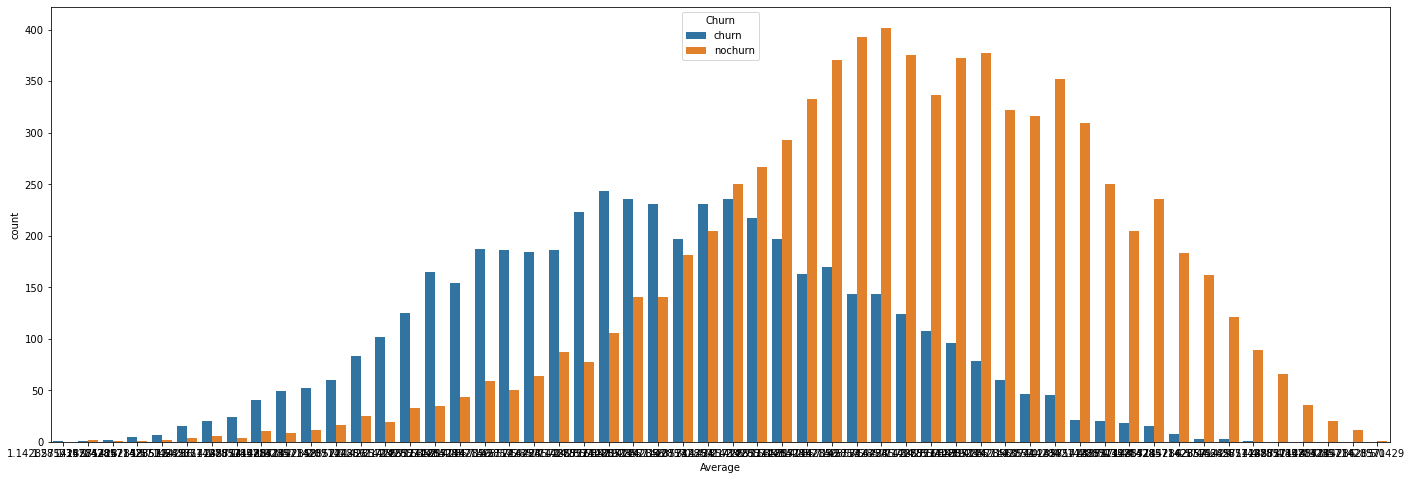

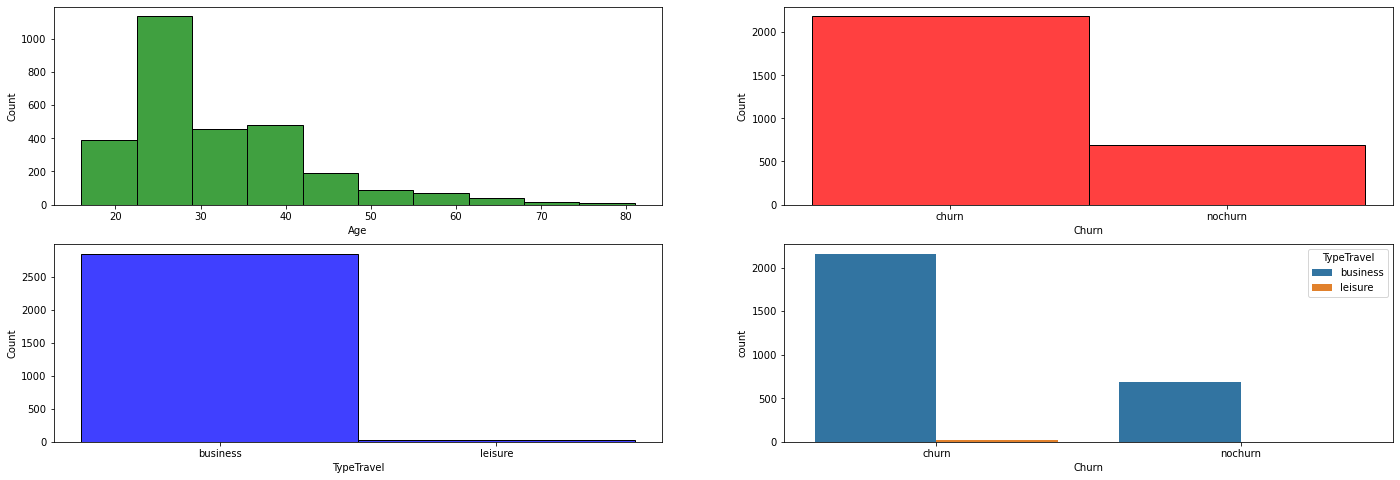

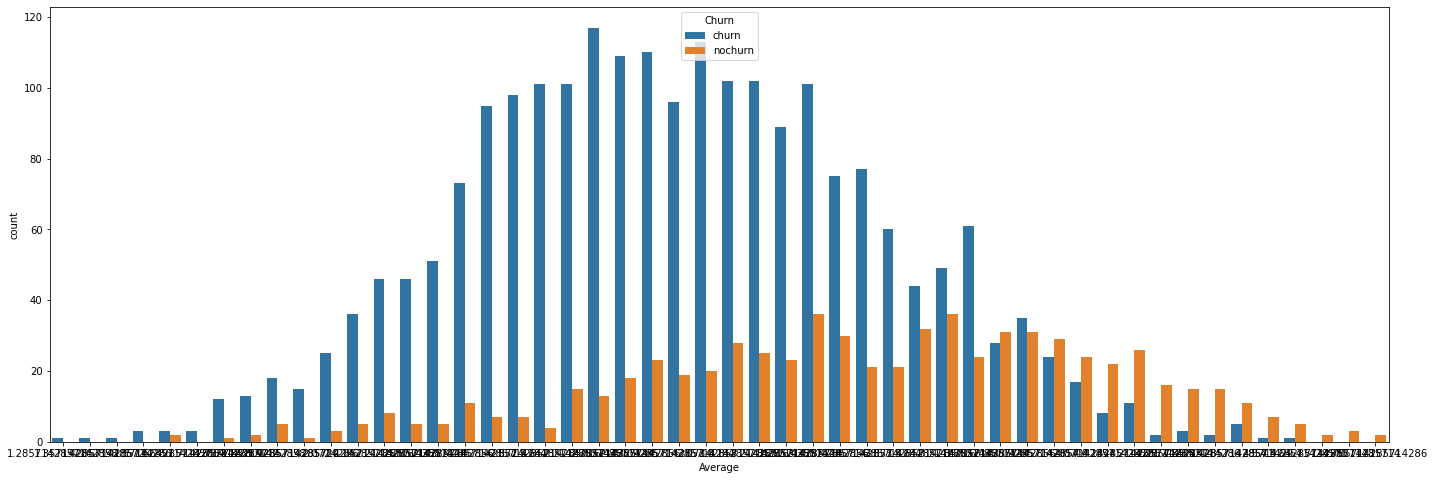

In [44]:
dflongevity_yes = df.query("Longevity == 'yes'")
dflongevity_no = df.query("Longevity == 'no'")

# Analising long term clients
figure = plt.figure(figsize=(24,8))
ax = plt.subplot(221)
sns.histplot(dflongevity_yes['Age'], color='g', bins = 10)
ax = plt.subplot(222)
sns.histplot(dflongevity_yes['Churn'], color='r')
ax = plt.subplot(223)
sns.histplot(dflongevity_yes['TypeTravel'], color='b')
ax = plt.subplot(224)
sns.countplot(x = 'Churn',hue = 'TypeTravel',data = dflongevity_yes)

figure = plt.figure(figsize=(24,8))
sns.countplot(x = 'Average',hue = 'Churn',data = dflongevity_yes)

# Analising new clients
figure = plt.figure(figsize=(24,8))
ax = plt.subplot(221)
sns.histplot(dflongevity_no['Age'], color='g', bins = 10)
ax = plt.subplot(222)
sns.histplot(dflongevity_no['Churn'], color='r')
ax = plt.subplot(223)
sns.histplot(dflongevity_no['TypeTravel'], color='b')
ax = plt.subplot(224)
sns.countplot(x = 'Churn',hue = 'TypeTravel',data = dflongevity_no)

figure = plt.figure(figsize=(24,8))
sns.countplot(x = 'Average',hue = 'Churn',data = dflongevity_no)

dflongevity_no['Churn'].value_counts()

Long Term clients:
* 60% still use or services
* 60% travel for business
* Age average is between 40 and 50 years old

New Clients: 
* High rate of Churn (about 76%)
* Average age below 30 years old
* Basically all business associated travels

**Scattering some more information related to Longevity and Churn**

<AxesSubplot:xlabel='Age', ylabel='Average'>

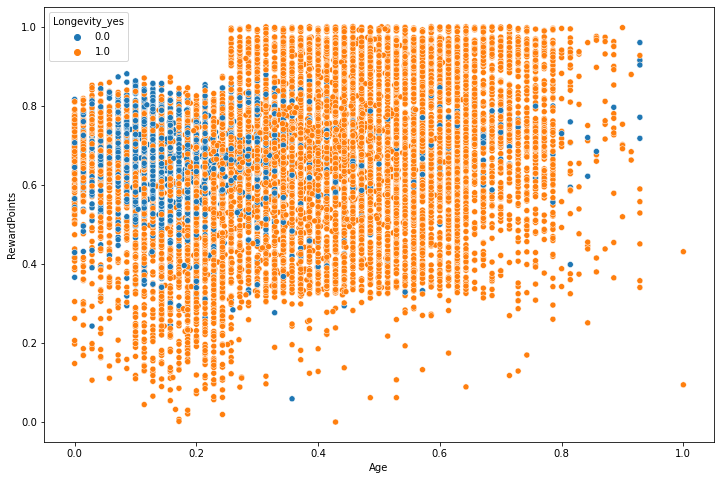

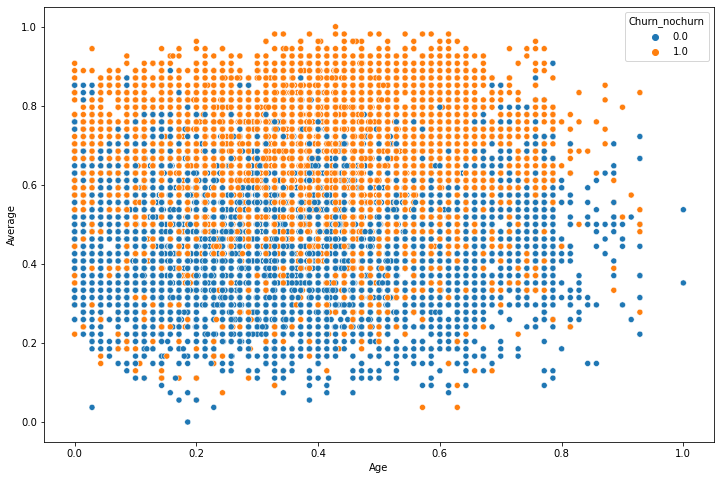

In [45]:
figure = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Age', y = 'RewardPoints', data = scaled_df, hue = 'Longevity_yes')

figure = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Age', y = 'Average', data = scaled_df, hue = 'Churn_nochurn')

* Longevity (long term clients) is mostly associated with older customers, as already observed above
* Again, Churn is highly associated with Lower average reviews

**Checking Correlations - now using our scaled dataframe**

<AxesSubplot:>

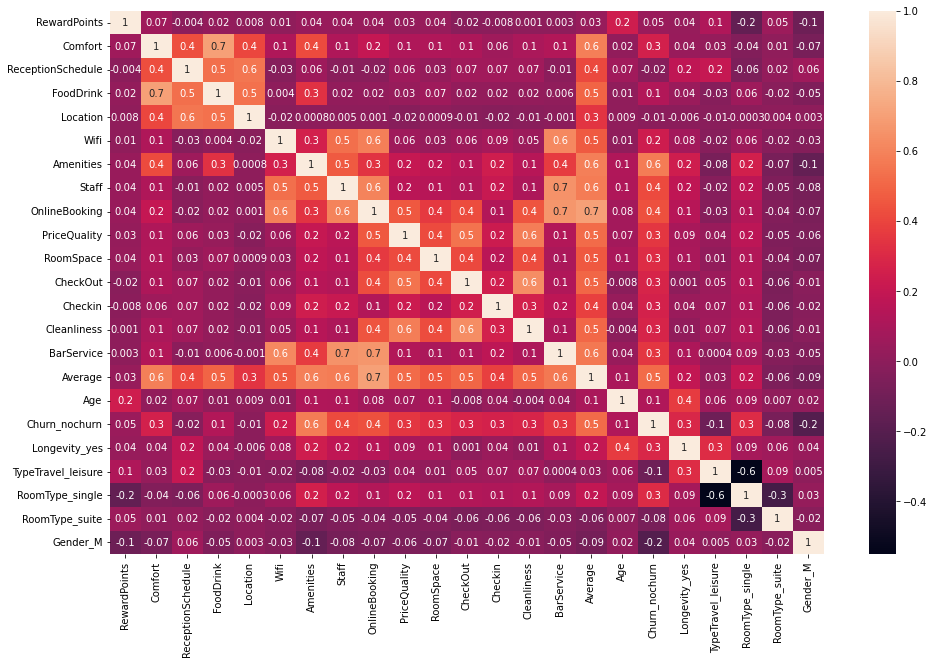

In [46]:
scaled_df_corr = scaled_df.corr(method = 'spearman') # novo objecto, que irá apresentar a correlação entre variáveis.
figure = plt.figure(figsize=(16,10))
sns.heatmap(scaled_df_corr, annot=True, fmt = '.1g')

**Having a better understanding of some of the moderate correlations**

<Figure size 432x288 with 0 Axes>

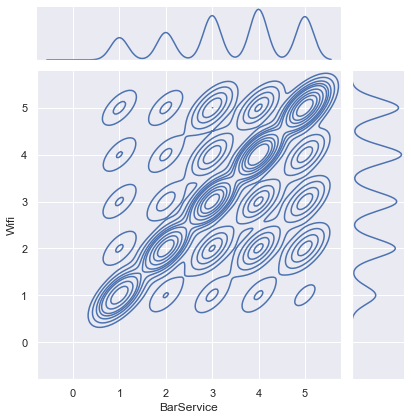

<Figure size 432x288 with 0 Axes>

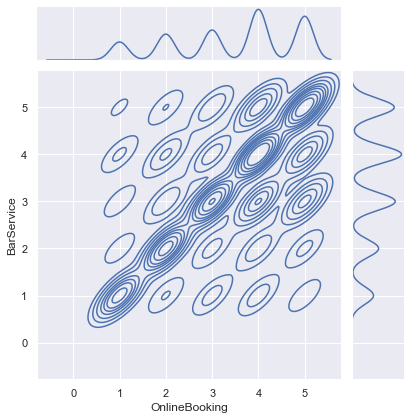

<Figure size 432x288 with 0 Axes>

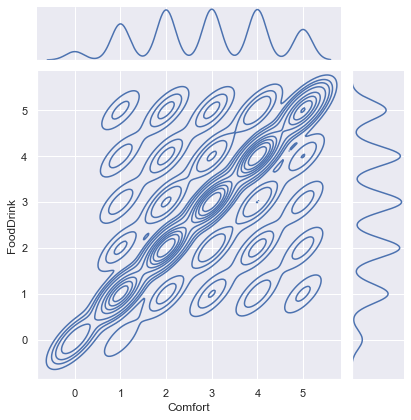

In [47]:
sns.set_theme(style="darkgrid")
figure = plt.figure()
sns.jointplot(x="BarService", y="Wifi", data=df, kind="kde")
figure = plt.figure()
sns.jointplot(x="OnlineBooking", y="BarService", data=df, kind="kde")
figure = plt.figure()
sns.jointplot(x="Comfort", y="FoodDrink", data=df, kind="kde")

* In these 3 examples, associated with correlations of 0.6 and 0.7, it is possible to verify that in those situations, the services reviews are usually paired

<a id='clustering'></a>

## 5. Clustering

After the preparation and cleaning, now we are going to cluster our dataset.

To perform this process we are splitting our dataframe into two separate dataframes: 
* df_reviews - contains all of the evaluated services
* df_customers - cointains the main characteristics of our customers (Churn, Longevity, TypeTravel, Gender and Age)

**The process is divided into 3 steps:** 
* Apply Kmeans to df_reviews
* Apply Kmeans to df_customers
* Concatenate all clusters into our cleaned dataset - df_clustered


In [241]:
df_reviews = df[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
df_customers = df[['Churn','Longevity','TypeTravel','Age','Gender']].copy()

<a id='reviews'></a>
### 5.1. Clustering df_reviews

* Apply Kmeans to a range of 1 to 10 clusters
* Estimate the ideal number of clusters
* Apply Kmeans and Analyze the results

Apply Kmeans - range of clusters from 1 to 10 - and calculate the corresponding inertia

In [242]:
k = range(1, 11) # clusters -> from 1 to 10
inertias = []
df_reviewsk = df_reviews.copy()

for i in k:
    model = KMeans(n_clusters=i) 
    model.fit(df_reviews)

    inertias.append(model.inertia_)

Plot number of clusters vs Inertia

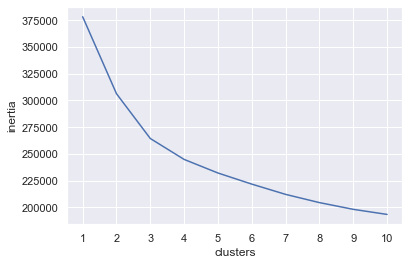

In [243]:
plt.plot(k, inertias)
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()

From the figure above, we estimate that the ideal number of clusters must be between 2 and 4. 

Hence, we are analysing the results for these 3 hypotheses:

**Kmeans - k = 2 clusters**

In [244]:
df_reviewsk2 = df_reviews.copy()
model = KMeans(n_clusters=2, random_state = 100).fit(df_reviewsk2)
df_reviewsk2['label'] = model.labels_

In [245]:
descr = df_reviewsk2.groupby(['label']).mean().transpose()
descr

label,0,1
Comfort,2.315749,3.218771
ReceptionSchedule,2.825285,3.120291
FoodDrink,2.535528,3.066645
Location,2.905414,3.043952
Wifi,2.401723,3.845561
Amenities,2.595663,3.932254
Staff,2.525684,4.208857
OnlineBooking,2.298062,4.282441
PriceQuality,2.824823,3.914629
RoomSpace,2.915411,3.868694


The clustering splitted into two clusters:
* Cluster 1 - lower average reviews for all services
* Cluster 0 - higher average reviews for all services 

**Kmeans - k = 3 clusters**

In [268]:
df_reviewsk3 = df_reviews.copy()
modelk3 = KMeans(n_clusters=3, random_state = 800).fit(df_reviewsk3)
df_reviewsk3['label'] = modelk3.labels_

In [269]:
descr = df_reviewsk3.groupby(['label']).mean().transpose()
descr

label,0,1,2
Comfort,2.402570,1.891684,4.008865
ReceptionSchedule,3.004867,1.828145,3.943334
FoodDrink,2.731750,1.617697,3.946637
Location,3.006813,1.997015,3.774031
Wifi,2.160016,3.871002,3.698071
Amenities,2.567841,3.342857,4.120459
Staff,2.296477,4.137527,4.072310
OnlineBooking,2.050224,4.162260,4.130888
PriceQuality,2.775355,3.693817,3.880236
RoomSpace,2.889819,3.622814,3.865809


The clustering splitted into three clusters:
* Cluster 0 - lower average reviews for most services
* Cluster 1 - medium/high reviews for most services, lower reviews for Comfort, ReceptionSchedule, FoodDrink, Location
* Cluster 2 - medium/high reviews for all services

**Kmeans - k = 4 clusters**

In [280]:
df_reviewsk4 = df_reviews.copy()
modelk4 = KMeans(n_clusters=4, random_state = 600).fit(df_reviewsk4)
df_reviewsk4['label'] = modelk4.labels_

In [281]:
descr = df_reviewsk4.groupby(['label']).mean().transpose()
descr

label,0,1,2,3
Comfort,2.387106,2.698085,4.038080,1.764387
ReceptionSchedule,3.058687,2.788218,3.988100,1.775787
FoodDrink,2.600173,2.795582,3.981357,1.565147
Location,2.963862,2.951399,3.808211,1.913952
Wifi,1.745013,3.489838,3.683062,3.819761
Amenities,2.263949,3.307216,4.134669,3.438654
Staff,1.844753,3.605302,4.088655,4.178610
OnlineBooking,1.941891,2.926657,4.228084,4.301574
PriceQuality,3.223475,2.193225,4.064459,4.021444
RoomSpace,3.264238,2.371429,4.003768,3.948697


The clustering splitted into four clusters:
* Cluster 0 - lower reviews for Wifi, Amenities, Staff, OnlineBooking, BarService
* Cluster 1 - lower reviews for PriceQuality, RoomSpace, CheckOut, Checkin, Cleanliness
* Cluster 2 - medium/high reviews for all services
* Cluster 3 - lower average reviews for Comfort, ReceptionSch, FoodDrink and Location

**Conclusion:**
* Two clusters is not enough, since it mainly splits into high and low averages
* Four clusters provides a detailed split related to the mainly correlated group of services/variables, which is not necessary.
* Three clusters provides a higher level of detail than with 2 clusters, without getting redundant information.

Therefore, we will consider **k = 3 clusters** for reviews

<a id='rev_3k'></a>
#### 5.1.1. Kmeans - K = 3 clusters

In [286]:
model = KMeans(n_clusters=3, random_state = 300).fit(df_reviews)
df_reviews['label'] = model.labels_
descr = df_reviews.groupby(['label']).mean().transpose()
descr

label,0,1,2
Comfort,2.402373,1.894098,4.009574
ReceptionSchedule,3.004862,1.828255,3.945170
FoodDrink,2.731039,1.619646,3.947955
Location,3.006223,1.998082,3.775283
Wifi,2.160638,3.872576,3.697476
Amenities,2.567483,3.344982,4.120801
Staff,2.297550,4.138291,4.072237
OnlineBooking,2.050758,4.163648,4.131070
PriceQuality,2.776352,3.692308,3.881636
RoomSpace,2.890315,3.621564,3.867363


Create a new df_clustered, and add to it the new column 'label_reviews'

In [287]:
df_clustered = df.copy()
df_clustered ['label_reviews'] = df_reviews['label']
df_clustered.head()

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,Gender,label_reviews
ReviewID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,3,3,3,4,3,4,3.285714,48.0,F,1
1,nochurn,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,5,5,5,1,5,2,3.142857,57.0,M,1
2,churn,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,3,2,3,2,3,1,2.714286,49.0,M,0
3,nochurn,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,4,4,4,4,4,3,3.142857,29.0,F,1
4,nochurn,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,5,3,4,1,3,5,3.571429,33.0,M,1


<a id='rev_explore'></a>
#### 5.1.2. Explore how these clusters impact the distribution of our dataset

Amount of reviews assigned to each cluster:
2    5745
0    5142
1    4693
Name: label_reviews, dtype: int64
 
Distribution of churn reviews by cluster:
0    4213
1    1645
2    1251
Name: label_reviews, dtype: int64
 
Distribution of nochurn reviews by cluster:
2    4494
1    3048
0     929
Name: label_reviews, dtype: int64


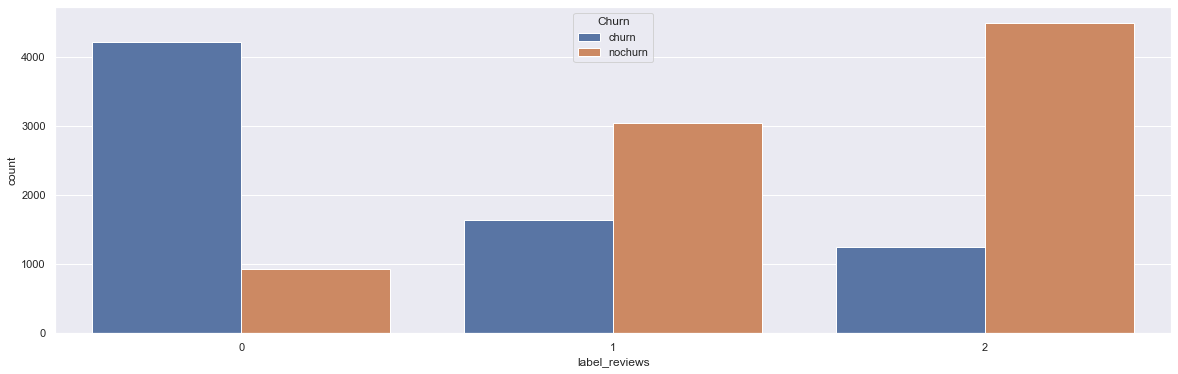

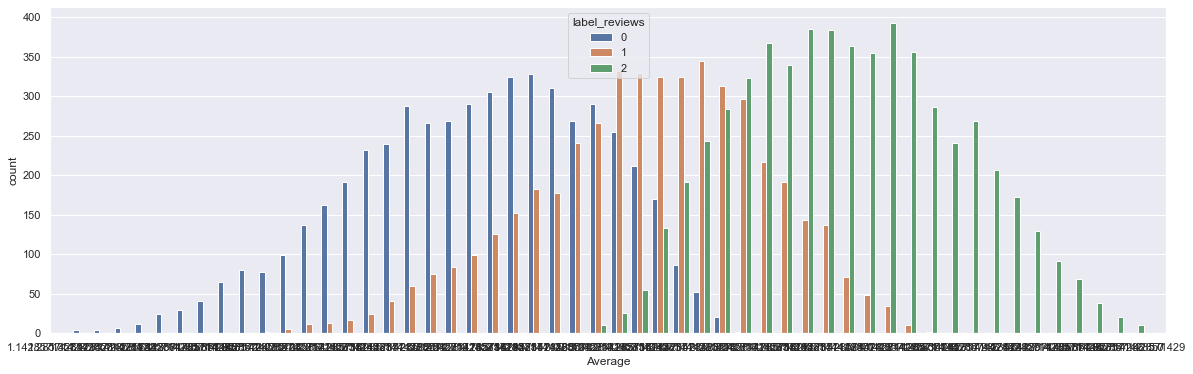

In [288]:
figure = plt.figure(figsize=(20,6))
sns.countplot(x = 'label_reviews',hue = 'Churn', data = df_clustered)
figure = plt.figure(figsize=(20,6))
sns.countplot(x = 'Average',hue = 'label_reviews', data = df_clustered)

print('Amount of reviews assigned to each cluster:')
print(df_clustered['label_reviews'].value_counts())
print(' ')
print('Distribution of churn reviews by cluster:')
print(df_clustered[df_clustered["Churn"]=='churn']['label_reviews'].value_counts())
print(' ')
print('Distribution of nochurn reviews by cluster:')
print(df_clustered[df_clustered["Churn"]=='nochurn']['label_reviews'].value_counts())

__Table:__ _Evaluation Clusters_

| Label    | Amount of Reviews    | Characteristics                                                                    | 
|----------|----------------------|------------------------------------------------------------------------------------|
| 0        | 5142                 | Lower Reviews and highest rate of churn                                            |  
| 1        | 4693                 | Medium/High Reviews, some churn / Lowest Reviews in Cmfrt, Lctn, FdDrk and RecSchd |
| 2        | 5745                 | Highest Reviews and mostly nochurn                                                |

<a id='customers'></a>
### 5.2.  Clustering df_customers

* Apply Kmeans to a range of 1 to 10 clusters
* Estimate the ideal number of clusters
* Apply Kmeans and Analyze the results

First step is to turn our categorical values into a form that can be used with Kmeans. 

df_customers - df_dummies - scaled_df_customers

In [307]:
df_dummies = pd.get_dummies(df_customers, drop_first = True)
scaled_df_customers = MinMaxScaler().fit_transform(df_dummies)
cols = df_dummies.columns
scaled_df_customers = pd.DataFrame(scaled_df_customers, columns = cols)
scaled_df_customers

,Age,Churn_nochurn,Longevity_yes,TypeTravel_leisure,Gender_M
0,0.457143,0.0,1.0,0.0,0.0
1,0.585714,1.0,1.0,0.0,1.0
2,0.471429,0.0,1.0,0.0,1.0
3,0.185714,1.0,1.0,1.0,0.0
4,0.242857,1.0,1.0,0.0,1.0
...,...,...,...,...,...
15575,0.257143,0.0,0.0,0.0,0.0
15576,0.085714,0.0,0.0,0.0,0.0
15577,0.600000,1.0,1.0,0.0,1.0
15578,0.200000,1.0,1.0,1.0,1.0


Apply Kmeans - range of clusters from 1 to 10 - and calculate the corresponding inertia

In [290]:
k = range(1, 11)
inertias = []
scaled_df_customersk = scaled_df_customers.copy()

for i in k:
    model = KMeans(n_clusters=i)  # Criar uma instância Kmeans, com i clusters
    model.fit(scaled_df_customersk)  # Fit model to samples

    inertias.append(model.inertia_)

Plot clusters vs Inertia

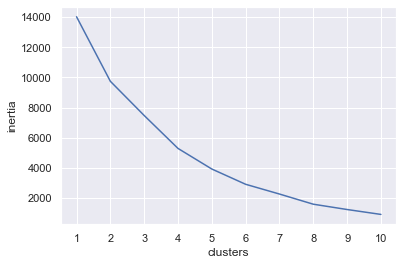

In [291]:
plt.plot(k, inertias)
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.xticks(k)
plt.show()

From the figure above, we estimate that the ideal number of clusters must be between 3 and 5. 

Hence, we are analysing the results for these 3 hypothesis:

**Kmeans - k = 3 clusters**

In [299]:
scaled_df_customersk3 = scaled_df_customers.copy()
modelk3 = KMeans(n_clusters=3, random_state = 100).fit(scaled_df_customersk3)
scaled_df_customersk3['label'] = modelk3.labels_

In [300]:
descr = scaled_df_customersk3.groupby(['label']).mean().transpose()
descr

label,0,1,2
Age,0.387151,0.319106,0.389089
Churn_nochurn,1.000000,0.000000,0.460870
Longevity_yes,0.889992,0.520089,0.995031
TypeTravel_leisure,0.000000,0.000000,1.000000
Gender_M,0.494476,0.474584,0.491718


The clustering splitted into three clusters:
* Cluster 0 - 100% nochurn, 89% longevity, 100% business, 50% male
* Cluster 1 - 0% nochurn, 52% longevity, 100% business, 50% male
* Cluster 2 - 50% nochurn, ~100% longevity, 100% leisure, 50% male

**Kmeans - k = 4 clusters**

In [305]:
scaled_df_customersk4 = scaled_df_customers.copy()
modelk4 = KMeans(n_clusters=4, random_state = 100).fit(scaled_df_customersk4)
scaled_df_customersk4['label'] = modelk4.labels_

In [304]:
descr = scaled_df_customersk4.groupby(['label']).mean().transpose()
descr

label,0,1,2,3
Age,0.386755,0.278679,0.403447,0.394947
Churn_nochurn,1.000000,0.099569,1.000000,0.000000
Longevity_yes,0.904576,0.314855,0.999582,0.997874
TypeTravel_leisure,0.070439,0.003767,0.416824,0.688281
Gender_M,1.000000,0.259688,0.000000,0.880680


The clustering splitted into four clusters:
* Cluster 0 - 100% nochurn, 90% longevity, 93% business, 100% male
* Cluster 1 - younger age, 90% churn, 30% longevity, 99% business, 74% female
* Cluster 2 - 100% nochurn, ~100% longevity, 60% business, 100% female
* Cluster 3 - 100% churn, ~100% longevity, 70% leisure, 88% male


**Kmeans - k = 5 clusters**

In [308]:
scaled_df_customersk5 = scaled_df_customers.copy()
modelk5 = KMeans(n_clusters=5, random_state = 100).fit(scaled_df_customersk5)
scaled_df_customersk5['label'] = modelk5.labels_

In [309]:
descr = scaled_df_customersk5.groupby(['label']).mean().transpose()
descr

label,0,1,2,3,4
Age,0.220495,0.396732,0.412354,0.406845,0.386595
Churn_nochurn,0.237294,0.000000,1.000000,0.704321,0.832150
Longevity_yes,0.000000,0.997586,0.996404,1.000000,0.999252
TypeTravel_leisure,0.004907,0.646047,0.000000,0.000000,1.000000
Gender_M,0.445846,1.000000,1.000000,0.000000,0.087477


The clustering splitted into four clusters:
* Cluster 0 - younger age, 77% churn, 0% longevity, 99% business, 44% male
* Cluster 1 - 100% churn, ~100% longevity, 65% leisure, 100% male
* Cluster 2 - 100% nochurn, ~100% longevity, 100% business, 100% male
* Cluster 3 - 70% nochurn, 100% longevity, 100% business, 100% female
* Cluster 4 - 83% nochurn, 100% longevity, 100% leisure, 92% female

**Conclusion:**
* Considering three clusters is not enough, mainly for the churn and typetravel clustering
* We get very similar results with four and five clusters

Therefore, in order to have minimum acceptable number of clusters, in this project we will consider **k = 4 clusters** for categorical/customer variables

<a id='cust_4k'></a>
#### 5.2.1. Kmeans - K = 4 clusters

In [321]:
model = KMeans(n_clusters=4, random_state = 200).fit(scaled_df_customers)
scaled_df_customers['label'] = model.labels_
descr = scaled_df_customers.groupby(['label']).mean().transpose()
descr

label,0,1,2,3
Age,0.278679,0.403447,0.394947,0.386755
Churn_nochurn,0.099569,1.000000,0.000000,1.000000
Longevity_yes,0.314855,0.999582,0.997874,0.904576
TypeTravel_leisure,0.003767,0.416824,0.688281,0.070439
Gender_M,0.259688,0.000000,0.880680,1.000000


In [322]:
dists = euclidean_distances(model.cluster_centers_)
dists

array([[0.        , 2.35228529, 1.53105768, 3.27455853],
       [2.35228529, 0.        , 1.6880053 , 1.45920756],
       [1.53105768, 1.6880053 , 0.        , 2.32480893],
       [3.27455853, 1.45920756, 2.32480893, 0.        ]])

Add the new column 'label' to df_customers 

In [323]:
df_customers['label'] = scaled_df_customers['label']
df_customers

,Churn,Longevity,TypeTravel,Age,Gender,label
ReviewID,,,,,,
0,churn,yes,business,48.0,F,0
1,nochurn,yes,business,57.0,M,3
2,churn,yes,business,49.0,M,2
3,nochurn,yes,leisure,29.0,F,1
4,nochurn,yes,business,33.0,M,3
...,...,...,...,...,...,...
15575,churn,no,business,34.0,F,0
15576,churn,no,business,22.0,F,0
15577,nochurn,yes,business,58.0,M,3


<a id='cust_explore'></a>
#### 5.2.2. Explore how these clusters impact the distribution of our dataset

<AxesSubplot:xlabel='label', ylabel='count'>

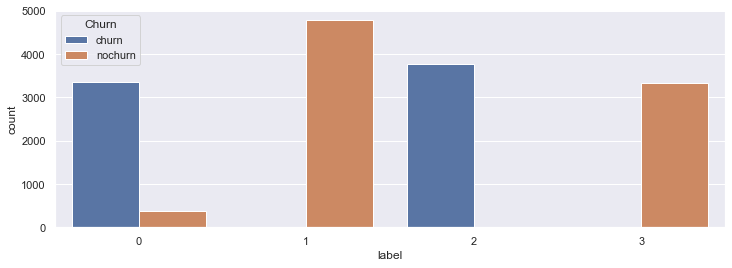

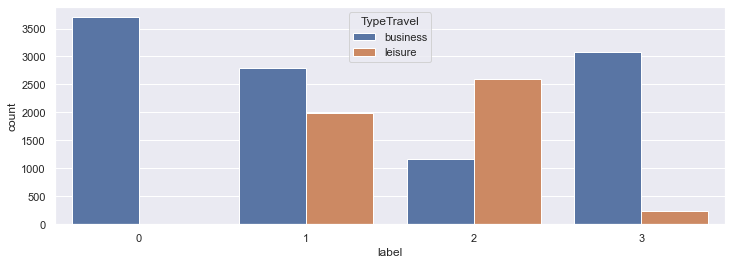

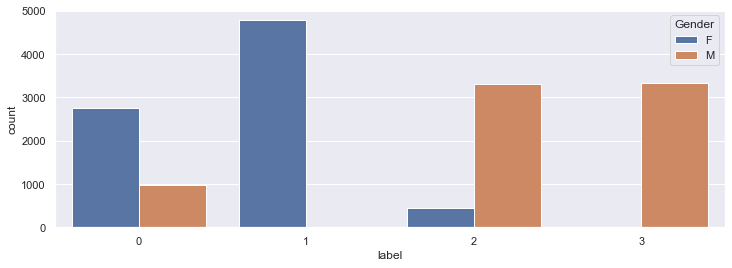

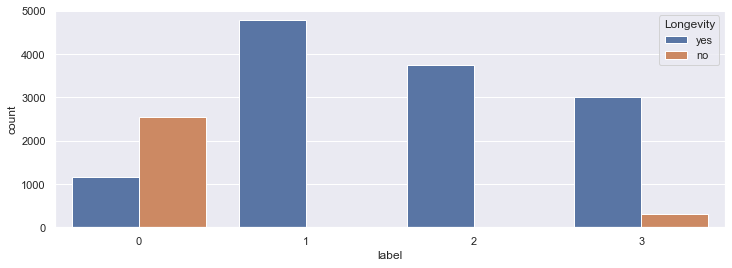

In [327]:
figure = plt.figure(figsize=(12,4))
sns.countplot(x = 'label',hue = 'Churn', data = df_customers)
figure = plt.figure(figsize=(12,4))
sns.countplot(x = 'label',hue = 'TypeTravel', data = df_customers)
figure = plt.figure(figsize=(12,4))
sns.countplot(x = 'label',hue = 'Gender', data = df_customers)
figure = plt.figure(figsize=(12,4))
sns.countplot(x = 'label',hue = 'Longevity', data = df_customers)

__Table:__ _Categorical Clusters_

| Label    | Amount of Reviews    | Churn     | Type Travel                  | Gender        | Longevity               | Age |
|----------|----------------------|-----------|------------------------------|---------------|-------------------------|-----|
| 0        | 3716                 | 90%       | 100% business                | 74% F         | 70% NO                  | 27  |
| 1        | 4779                 | 0%        | 58% business                 | 100% F        | 100% YES                | 40  |
| 2        | 3763                 | 100%      | 69% leisure                  | 88% M         | 100% YES                | 39  |
| 3        | 3322                 | 0%        | 93% business                 | 100% M        | 100% YES                | 39  |



In [328]:
customer_cluster_0 = df_customers[df_customers['label'] == 0]
customer_cluster_1 = df_customers[df_customers['label'] == 1]
customer_cluster_2 = df_customers[df_customers['label'] == 2]
customer_cluster_3 = df_customers[df_customers['label'] == 3]

print('***Cluster 0 Descriptive Summary of Categorical variables***')
print(customer_cluster_0.describe(include = ['O']))

print(' ')
print('***TypeTravel***')
print(customer_cluster_0['TypeTravel'].value_counts()/len(customer_cluster_0))

print(' ')
print('***Gender***')
print(customer_cluster_0['Gender'].value_counts()/len(customer_cluster_0))

print(' ')
print(' ')
print('***Cluster 1 Descriptive Summary of Categorical variables***')
print(customer_cluster_1.describe(include = ['O']))

print(' ')
print('***TypeTravel***')
print(customer_cluster_1['TypeTravel'].value_counts()/len(customer_cluster_1))

print(' ')
print('***Churn***')
print(customer_cluster_1['Churn'].value_counts()/len(customer_cluster_1))

print(' ')
print('***Gender***')
print(customer_cluster_1['Gender'].value_counts()/len(customer_cluster_1))

print(' ')
print(' ')
print('***Cluster 2 Descriptive Summary of Categorical variables***')
print(customer_cluster_2.describe(include = ['O']))

print(' ')
print('***TypeTravel***')
print(customer_cluster_2['TypeTravel'].value_counts()/len(customer_cluster_2))

print(' ')
print('***Churn***')
print(customer_cluster_2['Churn'].value_counts()/len(customer_cluster_2))

print(' ')
print('***Gender***')
print(customer_cluster_2['Gender'].value_counts()/len(customer_cluster_2))

print(' ')
print(' ')
print('***Cluster 3 Descriptive Summary of Categorical variables***')
print(customer_cluster_3.describe(include = ['O']))

print(' ')
print('***TypeTravel***')
print(customer_cluster_3['TypeTravel'].value_counts()/len(customer_cluster_3))

print(' ')
print('***Churn***')
print(customer_cluster_3['Churn'].value_counts()/len(customer_cluster_3))

print(' ')
print('***Gender***')
print(customer_cluster_3['Gender'].value_counts()/len(customer_cluster_3))


***Cluster 0 Descriptive Summary of Categorical variables***
        Churn Longevity TypeTravel Gender
count    3716      3716       3716   3716
unique      2         2          2      2
top     churn        no   business      F
freq     3346      2546       3702   2751
 
***TypeTravel***
business    0.996233
leisure     0.003767
Name: TypeTravel, dtype: float64
 
***Gender***
F    0.740312
M    0.259688
Name: Gender, dtype: float64
 
 
***Cluster 1 Descriptive Summary of Categorical variables***
          Churn Longevity TypeTravel Gender
count      4779      4779       4779   4779
unique        1         2          2      1
top     nochurn       yes   business      F
freq       4779      4777       2787   4779
 
***TypeTravel***
business    0.583176
leisure     0.416824
Name: TypeTravel, dtype: float64
 
***Churn***
nochurn    1.0
Name: Churn, dtype: float64
 
***Gender***
F    1.0
Name: Gender, dtype: float64
 
 
***Cluster 2 Descriptive Summary of Categorical variables***
        C

<a id='concat'></a>
### 5.3. Concatenate the new cluster in our new df_clustered

<a id='concat_cluster'></a>
#### 5.3.1. First concatenate the new clusters

Add a new column 'label categoric' to our df_clustered dataframe

In [329]:
df_clustered['label_categoric'] = df_customers['label']
df_clustered

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,Gender,label_reviews,label_categoric
ReviewID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,3,3,4,3,4,3.285714,48.0,F,1,0
1,nochurn,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,5,5,1,5,2,3.142857,57.0,M,1,3
2,churn,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,2,3,2,3,1,2.714286,49.0,M,0,2
3,nochurn,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,4,4,4,4,3,3.142857,29.0,F,1,1
4,nochurn,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,3,4,1,3,5,3.571429,33.0,M,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,churn,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,5,1,3,4,3,2.714286,34.0,F,1,0
15576,churn,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,1,3,4,4,5,3.571429,22.0,F,1,0
15577,nochurn,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,4,4,5,4,4,3.214286,58.0,M,1,3


Concatenate the reviews and categoric clusters into a 'final label' column

In [330]:
df_clustered['final_label'] = df_clustered['label_reviews'].astype(str) + df_clustered['label_categoric'].astype(str)

df_clustered

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,CheckOut,Checkin,Cleanliness,BarService,Average,Age,Gender,label_reviews,label_categoric,final_label
ReviewID,,,,,,,,,,,,,,,,,,,,,
0,churn,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,3,4,3,4,3.285714,48.0,F,1,0,10
1,nochurn,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,5,1,5,2,3.142857,57.0,M,1,3,13
2,churn,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,3,2,3,1,2.714286,49.0,M,0,2,02
3,nochurn,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,4,4,4,3,3.142857,29.0,F,1,1,11
4,nochurn,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,4,1,3,5,3.571429,33.0,M,1,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,churn,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,1,3,4,3,2.714286,34.0,F,1,0,10
15576,churn,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,3,4,4,5,3.571429,22.0,F,1,0,10
15577,nochurn,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,4,5,4,4,3.214286,58.0,M,1,3,13


<a id='concat_explore'></a>
#### 5.3.2. Explore the obtained final clusters

Distribution of our dataset through the final clusters:
21    2521
02    2173
00    2155
11    1817
23    1776
13    1173
10     934
22     821
12     769
20     627
01     441
03     373
Name: final_label, dtype: int64


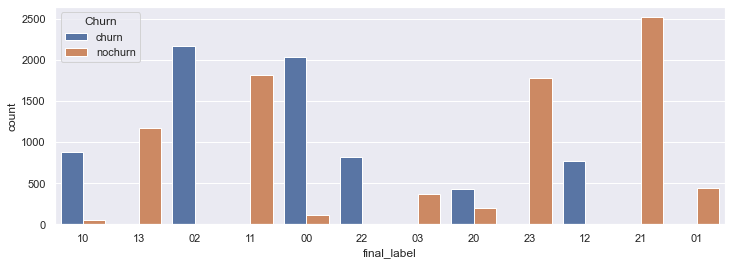

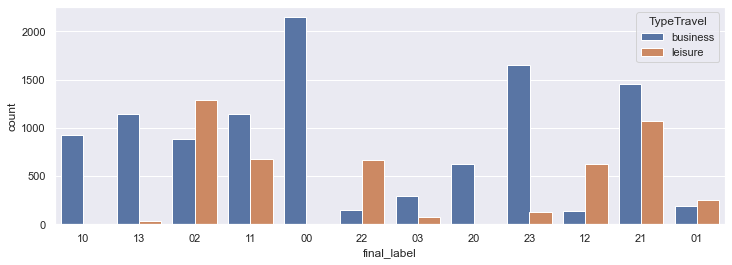

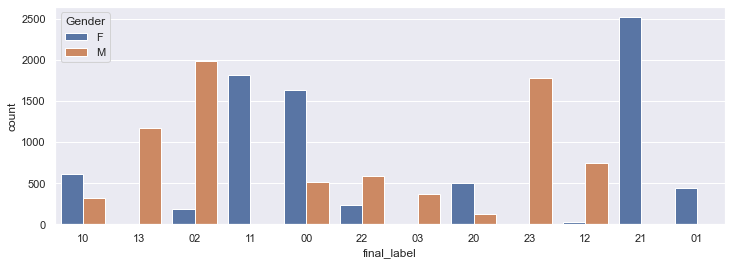

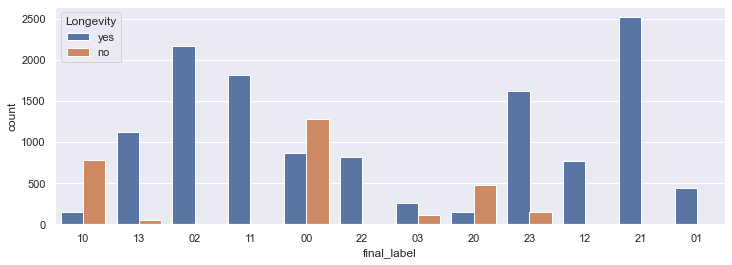

In [335]:
figure = plt.figure(figsize=(12,4))
sns.countplot(x = 'final_label',hue = 'Churn', data = df_clustered)
figure = plt.figure(figsize=(12,4))
sns.countplot(x = 'final_label',hue = 'TypeTravel', data = df_clustered)
figure = plt.figure(figsize=(12,4))
sns.countplot(x = 'final_label',hue = 'Gender', data = df_clustered)
figure = plt.figure(figsize=(12,4))
sns.countplot(x = 'final_label',hue = 'Longevity', data = df_clustered)

print('Distribution of our dataset through the final clusters:')
print(df_clustered['final_label'].value_counts())

Check the main descriptive characteristics of each cluster

In [333]:
cluster_unique = set(df_clustered['final_label'])
cluster_unique=list(cluster_unique)
cluster_unique.sort()


for cluster in cluster_unique:
    n_type_travel=0
    n_type_churn=0
    n_type_longevity=0
    n_type_gender=0
    n_cluster=0
    print('***Cluster ',cluster,' Descriptive Summary of variables***')
    for i in range(0 , len(df_clustered['final_label'] )) :
        if df_clustered.at[i,'final_label']==cluster :
            if df_clustered.at[i,'TypeTravel']=='business':
                n_type_travel+=1
            if df_clustered.at[i,'Churn']=='churn':
                n_type_churn+=1
            if df_clustered.at[i,'Longevity']=='yes':
                n_type_longevity+=1
            if df_clustered.at[i,'Gender']=='F':
                n_type_gender+=1
            n_cluster+=1
        i+=1
    #print(df_clustered[df_clustered['final_label'] == cluster].mean())
    print('Numero de Review :',n_cluster) 
    print("Business=","{0:.2%}".format(n_type_travel/n_cluster),
          "   |     Churn=","{0:.2%}".format(n_type_churn/n_cluster),
          "   |   Longevity_YES=","{0:.2%}".format(n_type_longevity/n_cluster),
          "   |   Female=","{0:.2%}".format(n_type_gender/n_cluster),
         )
    print("Leisure= ","{0:.2%}".format((n_cluster-n_type_travel)/n_cluster),
          "   |   NotChurn=","{0:.2%}".format((n_cluster-n_type_churn)/n_cluster),
          "   |    Longevity_NO=","{0:.2%}".format((n_cluster-n_type_longevity)/n_cluster),
          "   |    Male=","{0:.2%}".format((n_cluster-n_type_gender)/n_cluster)
         )
    print('')

***Cluster  00  Descriptive Summary of variables***
Numero de Review : 2155
Business= 99.63%    |     Churn= 94.66%    |   Longevity_YES= 40.37%    |   Female= 76.10%
Leisure=  0.37%    |   NotChurn= 5.34%    |    Longevity_NO= 59.63%    |    Male= 23.90%

***Cluster  01  Descriptive Summary of variables***
Numero de Review : 441
Business= 43.54%    |     Churn= 0.00%    |   Longevity_YES= 100.00%    |   Female= 100.00%
Leisure=  56.46%    |   NotChurn= 100.00%    |    Longevity_NO= 0.00%    |    Male= 0.00%

***Cluster  02  Descriptive Summary of variables***
Numero de Review : 2173
Business= 40.50%    |     Churn= 100.00%    |   Longevity_YES= 99.86%    |   Female= 8.70%
Leisure=  59.50%    |   NotChurn= 0.00%    |    Longevity_NO= 0.14%    |    Male= 91.30%

***Cluster  03  Descriptive Summary of variables***
Numero de Review : 373
Business= 79.36%    |     Churn= 0.00%    |   Longevity_YES= 69.71%    |   Female= 0.00%
Leisure=  20.64%    |   NotChurn= 100.00%    |    Longevity_NO= 

__Table:__ _Final Clusters_

| Label    | Amount of Reviews    | Churn     | Type Travel                  | Gender        | Longevity     | Age  |
|----------|----------------------|-----------|------------------------------|---------------|---------------|------|
| 00       | 2155                 | 95%       | 100% business                | 76% F         | 40%           | 36   |
| 01       | 441                  | 0%        | 56% leisure                  | 100% F        | 100%          | 42   |
| 02       | 2173                 | 100%      | 60% leisure                  | 92% M         | 100%          | 43   |
| 03       | 373                  | 0%        | 80% business                 | 100% M        | 70%           | 38   |
|----------|----------------------|-----------|------------------------------|---------------|---------------|------|
| 10       | 934                  | 94%       | 100% business                | 65% F         | 16%           | 33   |
| 11       | 1817                 | 0%        | 63% business                 | 100% F        | 100%          | 44   | 
| 12       | 769                  | 100%      | 82% leisure                  | 97% M         | 100%          | 44   |
| 13       | 1173                 | 0%        | 97% business                 | 100% M        | 95%           | 44   |
|----------|----------------------|-----------|------------------------------|---------------|---------------|------|
| 20       | 627                  | 69%       | 100% business                | 80% F         | 23%           | 33   |
| 21       | 2521                 | 0%        | 58% business                 | 100% F        | 100%          | 44   |
| 22       | 821                  | 100%      | 82% leisure                  | 71% M         | 100%          | 43   |
| 23       | 1776                 | 0%        | 93% business                 | 100% M        | 91%           | 44   |





<a id='insights'></a>

## 6. FINAL EXPLORATION | INSIGHTS

In order to prepare the draft for our Marketing Plan, first we need to establish the decisive features that we are focusing on. 

Our main focus will be the customers who **stopped using our services (Churn).** From those customers, we will explore: 
   * What the lowest evaluations are.
   * Type of travel used. 
   * Average age of the customers.
   * Whether they are long term or new customers.
   
To focus our efforts on the biggest amount of customers, we are selecting the clusters that contain the higher amount of reviews, which are: 

| Label    | Amount of Reviews    | Churn     | Type Travel                  | Gender        | Longevity     | Age  |
|----------|----------------------|-----------|------------------------------|---------------|---------------|------|
| 00       | 2155                 | 95%       | 100% business                | 76% F         | 40%           | 36   |
| 02       | 2173                 | 100%      | 60% leisure                  | 92% M         | 100%          | 43   |
| 10       | 934                  | 94%       | 100% business                | 65% F         | 16%           | 33   |
| 12       | 769                  | 100%      | 82% leisure                  | 97% M         | 100%          | 44   |

This group represents **39%** of our dataset.

There are another two clusters associated with Churn customers (20 and 22). However, they represent a group that gave a general high review but still stopped using our services, which is quite different from the selected clusters. 

However, in order to invest more efficiently in our Marketing Plan, at this stage we decided to leave them out of the analysis. 

<a id='cluster_00'></a>
### 6.1. Exploring Cluster 00

Descriptive analysis of the data - focus on Longevity variable

In [4]:
cluster_00 = df_clustered[df_clustered['final_label'] == '00'].copy()
cluster_00.describe()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,label_reviews,label_categoric
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.00000,2155.0,2155.0
mean,4995.365661,2.312297,2.600464,2.712297,3.033875,2.165197,2.539211,2.272390,2.018561,2.703016,2.800464,3.125754,2.708585,3.085847,2.043619,2.580113,36.72065,0.0,0.0
std,960.281892,1.015393,1.424191,1.228648,1.178287,1.058017,1.059387,1.012711,0.851907,1.237740,1.313136,1.137060,1.263918,1.144832,0.915638,0.413237,13.28524,0.0,0.0
min,1178.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.142857,16.00000,0.0,0.0
25%,4526.500000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.285714,26.00000,0.0,0.0
50%,5068.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.571429,34.00000,0.0,0.0
75%,5551.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.857143,44.00000,0.0,0.0
max,6945.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.500000,81.00000,0.0,0.0


In [5]:
cluster_00[cluster_00['Longevity'] =='no'].describe()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,label_reviews,label_categoric
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.0,1285.0
mean,4977.396887,2.477043,2.322179,2.483268,3.038132,1.964202,2.458366,2.000778,1.969650,2.967315,3.054475,3.528405,2.936187,3.481712,1.947860,2.616398,32.123735,0.0,0.0
std,600.685729,1.096075,1.423167,1.122862,1.073299,0.844790,1.122907,0.962295,0.856447,1.297802,1.360945,1.063488,1.315131,1.086171,0.833259,0.400097,10.803085,0.0,0.0
min,1412.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.285714,16.000000,0.0,0.0
25%,4687.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000,2.357143,24.000000,0.0,0.0
50%,5038.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,3.000000,4.000000,2.000000,2.642857,29.000000,0.0,0.0
75%,5371.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.928571,38.000000,0.0,0.0
max,6451.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.500000,81.000000,0.0,0.0


In [6]:
cluster_00[cluster_00['Longevity'] =='yes'].describe()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,label_reviews,label_categoric
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.0,870.0
mean,5021.905747,2.068966,3.011494,3.050575,3.027586,2.462069,2.658621,2.673563,2.090805,2.312644,2.425287,2.531034,2.372414,2.501149,2.185057,2.526519,43.510345,0.0,0.0
std,1323.405095,0.825278,1.323369,1.298745,1.318776,1.253877,0.945956,0.950617,0.840452,1.026104,1.140652,0.969419,1.102011,0.965158,1.009281,0.426533,13.698353,0.0,0.0
min,1178.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.142857,16.000000,0.0,0.0
25%,4128.750000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.214286,33.000000,0.0,0.0
50%,5146.500000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.500000,43.000000,0.0,0.0
75%,6185.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.857143,53.000000,0.0,0.0
max,6945.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.357143,81.000000,0.0,0.0


Split services evaluations into two different dataframes by Longevity 

In [7]:
cluster_00_long_no = cluster_00[cluster_00['Longevity'] =='no'].copy()
cluster_00_long_yes = cluster_00[cluster_00['Longevity'] =='yes'].copy()
reviews_00_no = cluster_00_long_no[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
reviews_00_yes = cluster_00_long_yes[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
mean_no = reviews_00_no.mean(axis = 0)
mean_no = pd.DataFrame(mean_no)
mean_no = mean_no.transpose()

mean_yes = reviews_00_yes.mean(axis = 0)
mean_yes = pd.DataFrame(mean_yes)
mean_yes = mean_yes.transpose()

C:\Users\e349454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\e349454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cluster 00 vs Longevity-YES: Distribution of average evaluations')

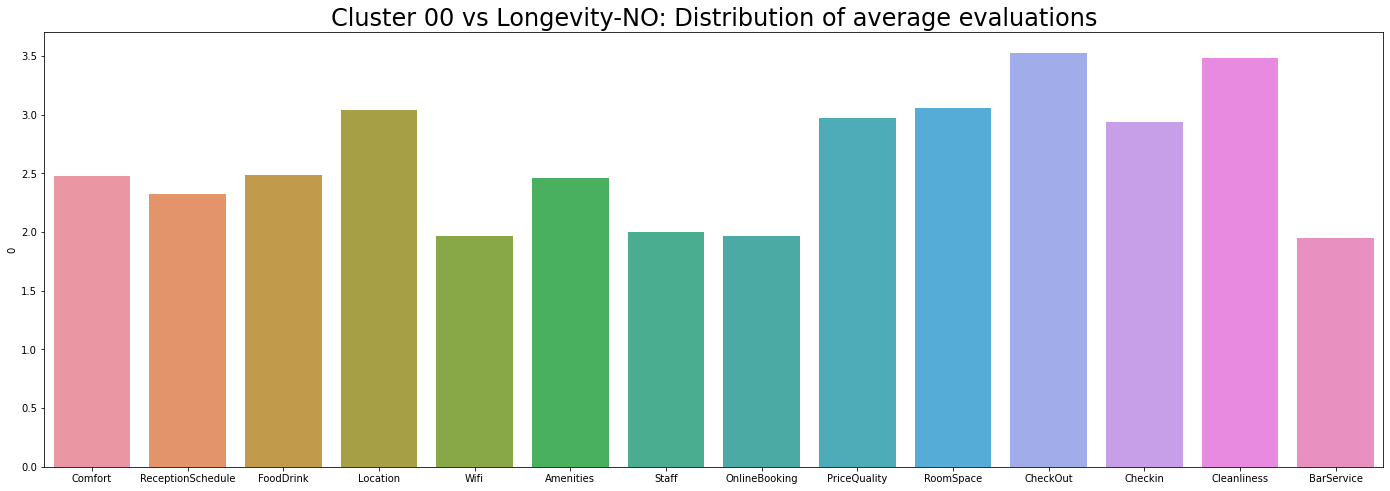

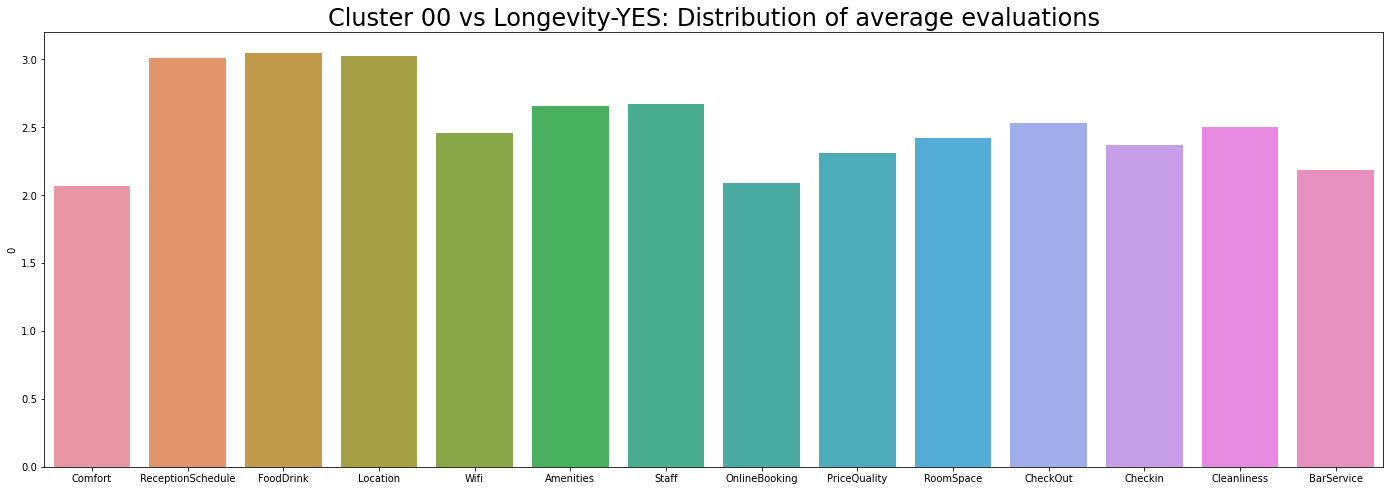

In [8]:
figure = plt.figure(figsize=(24,8))
sns.barplot(mean_no.columns,mean_no.loc[0]).set_title('Cluster 00 vs Longevity-NO: Distribution of average evaluations',fontdict= { 'fontsize': 24}) 
               
figure = plt.figure(figsize=(24,8))
sns.barplot(mean_yes.columns,mean_yes.loc[0]).set_title('Cluster 00 vs Longevity-YES: Distribution of average evaluations',fontdict= { 'fontsize': 24})

**DESCRIPTION** (2155 reviews)

    Average Age -> 37 anos
    Lower Reviews -> BarService (2.04) | OnlineBooking (2.01) | Wifi (2.16)
    
**CLUSTER 00 (Longevity = no)** (1285 reviews)
    
    Average Age -> 32 anos
    Lower Reviews -> BarService (1.94) | OnlineBooking (1.96) | Wifi (1.96)
    
**CLUSTER 00 (Longevity = yes)** (870 reviews)
    
    Average Age -> 43 anos
    Lower Reviews -> BarService (2.18) | OnlineBooking (2.09) | Comfort (2.06)


* For new clients, which represent a younger segment of the customers, the worst services were BarService, Wifi and OnlineBooking.

* As for long term clients, were BarService, OnlineBooking and Comfort.

* This cluster is also highly related with Female customers.

<a id='cluster_02'></a>
### 6.2. Exploring Cluster 02

Descriptive analysis of the data - in this case focusing on type of travel

In [10]:
cluster_02 = df_clustered[df_clustered['final_label'] == '02'].copy()
cluster_02.describe()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,label_reviews,label_categoric
count,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.0,2173.0
mean,4898.579844,2.339623,3.415094,2.722043,3.012885,2.128394,2.459273,2.268753,2.019328,2.802577,2.936493,3.242982,2.849977,3.226875,2.084676,2.679212,43.851358,0.0,2.0
std,937.966378,0.940044,1.384535,1.262163,1.230677,1.008066,1.072777,1.040401,0.880312,1.282103,1.279034,1.181835,1.275042,1.188332,0.935887,0.414538,14.622679,0.0,0.0
min,1326.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.285714,16.000000,0.0,2.0
25%,4396.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.357143,32.000000,0.0,2.0
50%,5019.000000,2.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.714286,44.000000,0.0,2.0
75%,5457.000000,3.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,54.000000,0.0,2.0
max,6949.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.571429,86.000000,0.0,2.0


In [11]:
cluster_02[cluster_02['TypeTravel'] =='leisure'].describe()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,label_reviews,label_categoric
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.0,1293.0
mean,4983.562258,2.518175,3.666667,2.447796,2.960557,1.988399,2.444702,2.138438,1.968291,3.121423,3.165507,3.570766,3.171694,3.549111,2.005414,2.765496,43.568445,0.0,2.0
std,763.932287,0.977622,1.338098,1.132043,1.137929,0.914633,1.148864,1.081157,0.914156,1.316699,1.245606,1.207169,1.285151,1.227942,0.921435,0.371677,15.225122,0.0,0.0
min,1825.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.428571,16.000000,0.0,2.0
25%,4581.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000,2.500000,32.000000,0.0,2.0
50%,5053.000000,3.000000,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,3.000000,4.000000,2.000000,2.785714,44.000000,0.0,2.0
75%,5438.000000,3.000000,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.071429,55.000000,0.0,2.0
max,6949.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.571429,71.000000,0.0,2.0


In [12]:
cluster_02_leisure = cluster_02[cluster_02['TypeTravel'] =='leisure'].copy()
cluster_02_business = cluster_02[cluster_02['TypeTravel'] =='business'].copy()
reviews_02_leisure = cluster_02_leisure[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
reviews_02_business = cluster_02_business[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
mean_leisure = reviews_02_leisure.mean(axis = 0)
mean_leisure = pd.DataFrame(mean_leisure)
mean_leisure = mean_leisure.transpose()

mean_business = reviews_02_business.mean(axis = 0)
mean_business = pd.DataFrame(mean_business)
mean_business = mean_business.transpose()

C:\Users\e349454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\e349454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cluster 02 vs Business: Distribution of average evaluations')

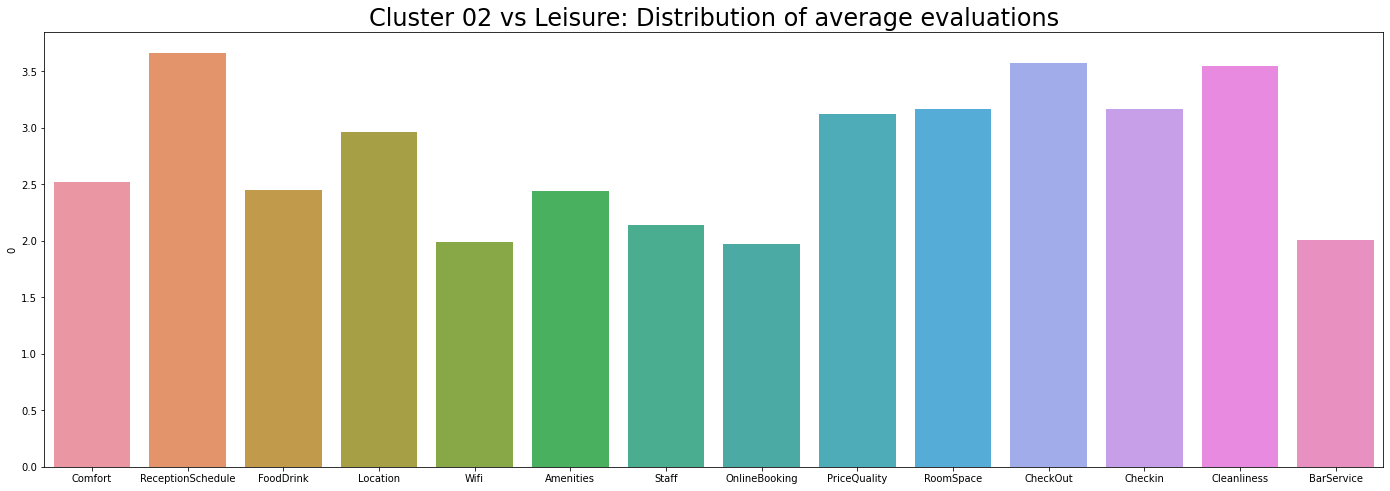

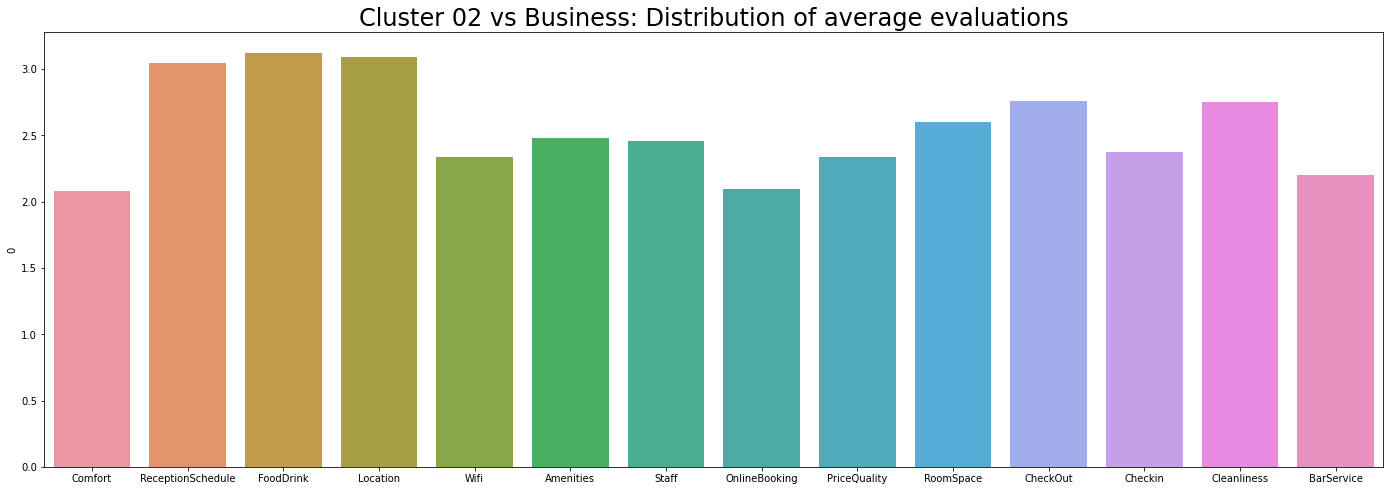

In [13]:
figure = plt.figure(figsize=(24,8))
sns.barplot(mean_leisure.columns,mean_leisure.loc[0]).set_title('Cluster 02 vs Leisure: Distribution of average evaluations',fontdict= { 'fontsize': 24}) 
               
figure = plt.figure(figsize=(24,8))
sns.barplot(mean_business.columns,mean_business.loc[0]).set_title('Cluster 02 vs Business: Distribution of average evaluations',fontdict= { 'fontsize': 24}) 

**DESCRIPTION** (2173 reviews)

    Average age -> 44 anos
    Lower Reviews -> BarService (2.08) | OnlineBooking (2.02) | Wifi (2.12)
    
**CLUSTER 02 (Leisure)** (1293 reviews)
    
    Lower Reviews -> BarService (2.01) | OnlineBooking (1.96) | Wifi (1.98)
    
**CLUSTER 03 (Business)** (880 reviews)
    
    Lower Reviews -> BarService (2.20) | OnlineBooking (2.09) | Comfort (2.07)

* For customer in leisure type travels, the worst evaluated services were BarService, Wifi and OnlineBooking

* As for business customers, were BarService, OnlineBooking and Comfort.

* This cluster is also composed by long term customers, highly related with male customers.
    

<a id='cluster_10'></a>
### 6.3. Exploring Cluster 10

In [14]:
cluster_10 = df_clustered[df_clustered['final_label'] == '10'].copy()
cluster_10.describe()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,label_reviews,label_categoric
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.0,934.0
mean,5024.663812,2.156317,1.589936,1.816916,2.581370,4.123126,2.153105,3.906852,4.103854,3.231263,3.125268,3.654176,3.097430,3.605996,4.069593,3.086800,33.804069,1.0,0.0
std,734.304272,1.043110,1.177652,0.961027,1.161787,0.899470,1.081416,1.066340,0.835266,1.210019,1.331595,1.034920,1.267169,1.040965,0.893274,0.372336,11.393815,0.0,0.0
min,1718.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.071429,16.000000,1.0,0.0
25%,4689.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,3.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,4.000000,2.857143,25.000000,1.0,0.0
50%,5087.500000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.071429,31.000000,1.0,0.0
75%,5444.000000,3.000000,2.000000,2.000000,3.000000,5.000000,3.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.357143,40.000000,1.0,0.0
max,6932.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.071429,81.000000,1.0,0.0


In [15]:
cluster_10[cluster_10['Longevity'] =='no'].describe(include = 'O')

,Churn,Name,Longevity,TypeTravel,RoomType,Gender,final_label
count,781,781,781,781,781,781,781
unique,2,777,1,2,3,2,1
top,churn,Ms. Susan Moore,no,business,double,F,10
freq,723,2,781,778,475,456,781


In [16]:
cluster_10[cluster_10['Longevity'] =='yes'].describe(include = 'O')

,Churn,Name,Longevity,TypeTravel,RoomType,Gender,final_label
count,153,153,153,153,153,153,153
unique,1,152,1,1,3,1,1
top,churn,Ms. Tammy Cohen,yes,business,single,F,10
freq,153,2,153,153,90,153,153


In [17]:
cluster_10_long_no = cluster_10[cluster_10['Longevity'] =='no'].copy()
cluster_10_long_yes = cluster_10[cluster_10['Longevity'] =='yes'].copy()
reviews_10_no = cluster_10_long_no[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
reviews_10_yes = cluster_10_long_yes[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
mean_no = reviews_10_no.mean(axis = 0)
mean_no = pd.DataFrame(mean_no)
mean_no = mean_no.transpose()

mean_yes = reviews_10_yes.mean(axis = 0)
mean_yes = pd.DataFrame(mean_yes)
mean_yes = mean_yes.transpose()

C:\Users\e349454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\e349454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cluster 10 vs Longevity-YES: Distribution of average evaluations')

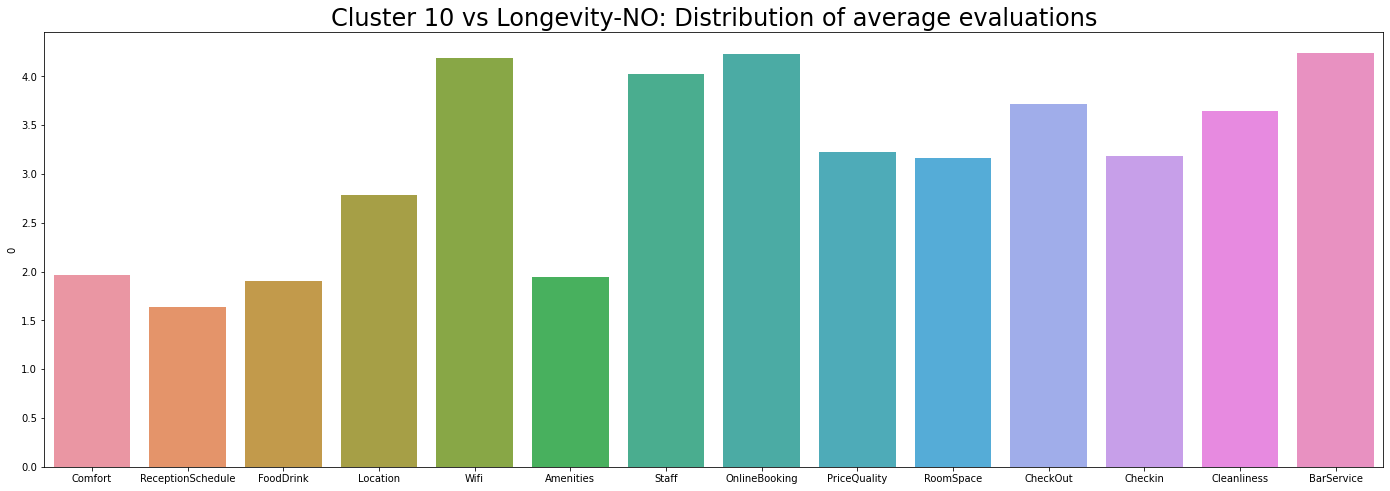

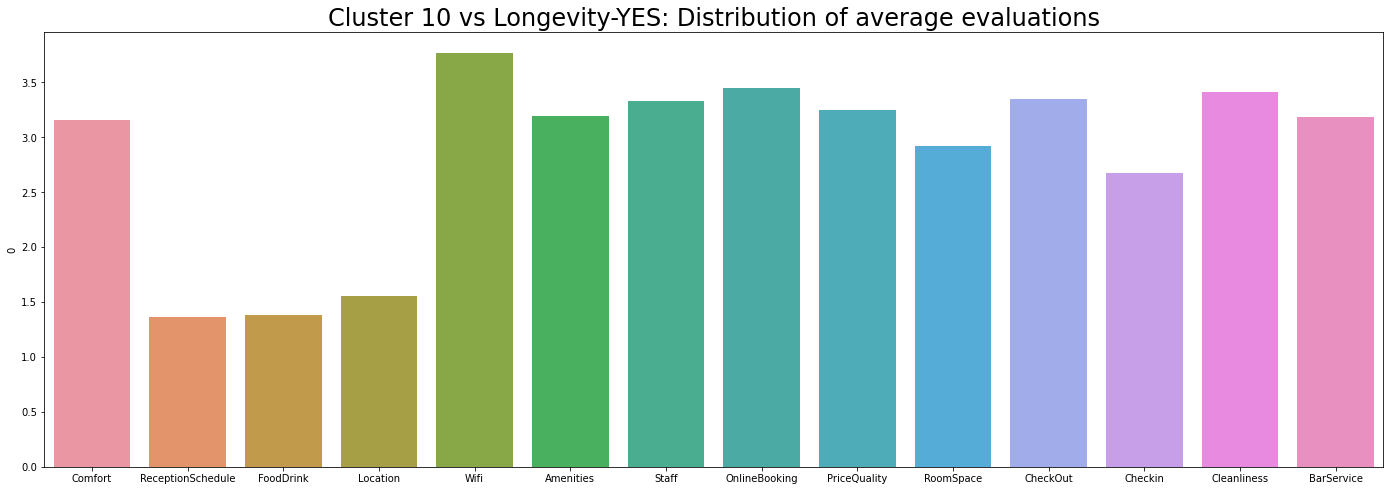

In [18]:
figure = plt.figure(figsize=(24,8))
sns.barplot(mean_no.columns,mean_no.loc[0]).set_title('Cluster 10 vs Longevity-NO: Distribution of average evaluations',fontdict= { 'fontsize': 24}) 
               
figure = plt.figure(figsize=(24,8))
sns.barplot(mean_yes.columns,mean_yes.loc[0]).set_title('Cluster 10 vs Longevity-YES: Distribution of average evaluations',fontdict= { 'fontsize': 24}) 

**DESCRIPTION** (934 reviews)

    Average Age -> 34 anos
    Lower Reviews -> Comfort (2.15) | ReceptionSchedule (1.59) | FoodDrink (1.81)
    
**CLUSTER 10 (Longevity = no)** (781 reviews)
    
    Average Age -> 31 anos
    Lower Reviews -> Comfort (1.96) | ReceptionSchedule (1.63) | FoodDrink (1.90)
    Gender -> 60% Feminino
    
**CLUSTER 10 (Longevity = yes)** (153 reviews)
    
    Average Age -> 44 anos
    Lower Reviews -> ReceptionSchedule (1.36) | FoodDrink (1.38) | Location (1.55)
    Gender -> Female


* For new clients (781 customers), which represent a younger segment of the customers, the worst services were Comfort, ReceptionSchedule and FoodDrink.

* As for long term clients, were ReceptionSchedule, FoodDrink and Location.

<a id='cluster_12'></a>
### 6.4. Exploring Cluster 12

In [19]:
cluster_12 = df_clustered[df_clustered['final_label'] == '12'].copy()
cluster_12.describe()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,label_reviews,label_categoric
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.0,769.0
mean,4993.105332,2.150845,2.972692,1.651495,2.460338,4.061118,2.180754,4.010403,4.130039,3.297789,3.133940,3.617685,3.228869,3.642393,4.154746,3.192365,43.859558,1.0,2.0
std,786.291846,0.950947,1.597698,0.896028,1.148505,0.981686,1.199976,0.931171,0.788092,1.197222,1.342031,1.073836,1.266413,1.069620,0.804111,0.380588,15.066037,0.0,0.0
min,1544.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.142857,16.000000,1.0,2.0
25%,4609.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,4.000000,2.928571,32.000000,1.0,2.0
50%,5068.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.214286,44.000000,1.0,2.0
75%,5471.000000,3.000000,4.000000,2.000000,3.000000,5.000000,3.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.500000,55.000000,1.0,2.0
max,6944.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.071429,86.000000,1.0,2.0


In [20]:
cluster_12[cluster_12['TypeTravel'] =='leisure'].describe()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Average,Age,label_reviews,label_categoric
count,627.000000,627.00000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.0,627.0
mean,5017.740032,1.91866,3.331738,1.714514,2.671451,4.141946,1.925040,4.124402,4.269537,3.393939,3.175439,3.708134,3.336523,3.733652,4.314195,3.268512,43.601276,1.0,2.0
std,706.718614,0.79420,1.507700,0.907810,1.117905,0.972766,1.113005,0.940988,0.734203,1.210772,1.351074,1.113085,1.266422,1.108002,0.700415,0.351909,15.347951,0.0,0.0
min,2653.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.285714,16.000000,1.0,2.0
25%,4634.000000,1.00000,2.000000,1.000000,2.000000,4.000000,1.000000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.071429,31.000000,1.0,2.0
50%,5087.000000,2.00000,4.000000,2.000000,3.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.285714,44.000000,1.0,2.0
75%,5472.000000,2.00000,4.000000,2.000000,3.000000,5.000000,2.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,3.500000,55.000000,1.0,2.0
max,6940.000000,4.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.071429,71.000000,1.0,2.0


In [21]:
cluster_12_leisure = cluster_12[cluster_12['TypeTravel'] =='leisure'].copy()
cluster_12_business = cluster_12[cluster_12['TypeTravel'] =='business'].copy()
reviews_12_leisure = cluster_12_leisure[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
reviews_12_business = cluster_12_business[['Comfort','ReceptionSchedule','FoodDrink','Location','Wifi','Amenities','Staff','OnlineBooking','PriceQuality','RoomSpace','CheckOut','Checkin','Cleanliness','BarService']].copy()
mean_leisure = reviews_12_leisure.mean(axis = 0)
mean_leisure = pd.DataFrame(mean_leisure)
mean_leisure = mean_leisure.transpose()

mean_business = reviews_12_business.mean(axis = 0)
mean_business = pd.DataFrame(mean_business)
mean_business = mean_business.transpose()

C:\Users\e349454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\e349454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cluster 12 vs Business: Distribution of average evaluations')

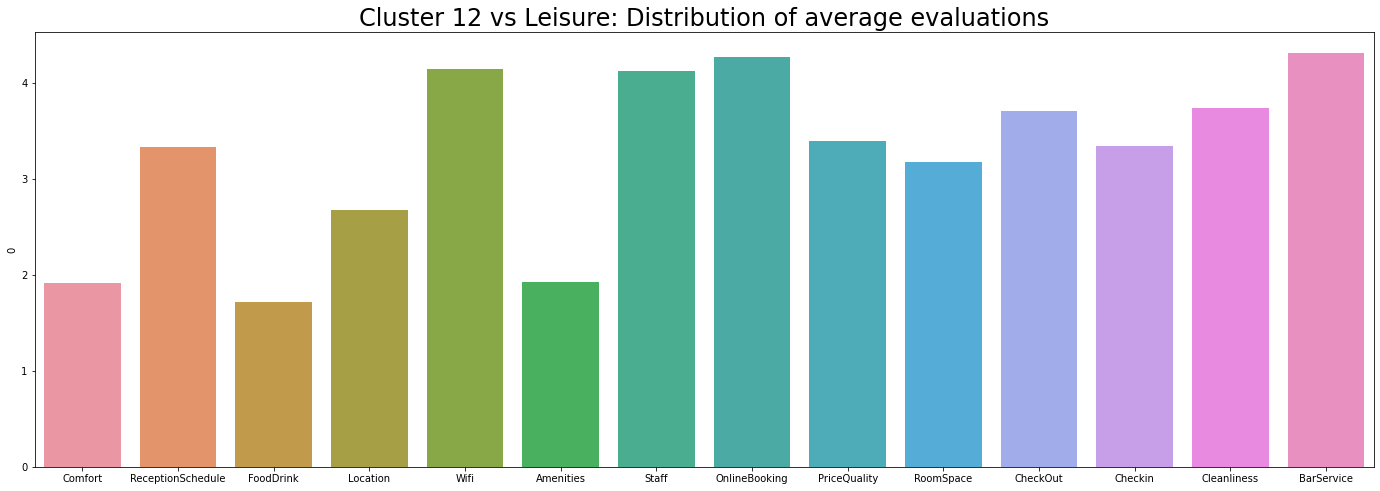

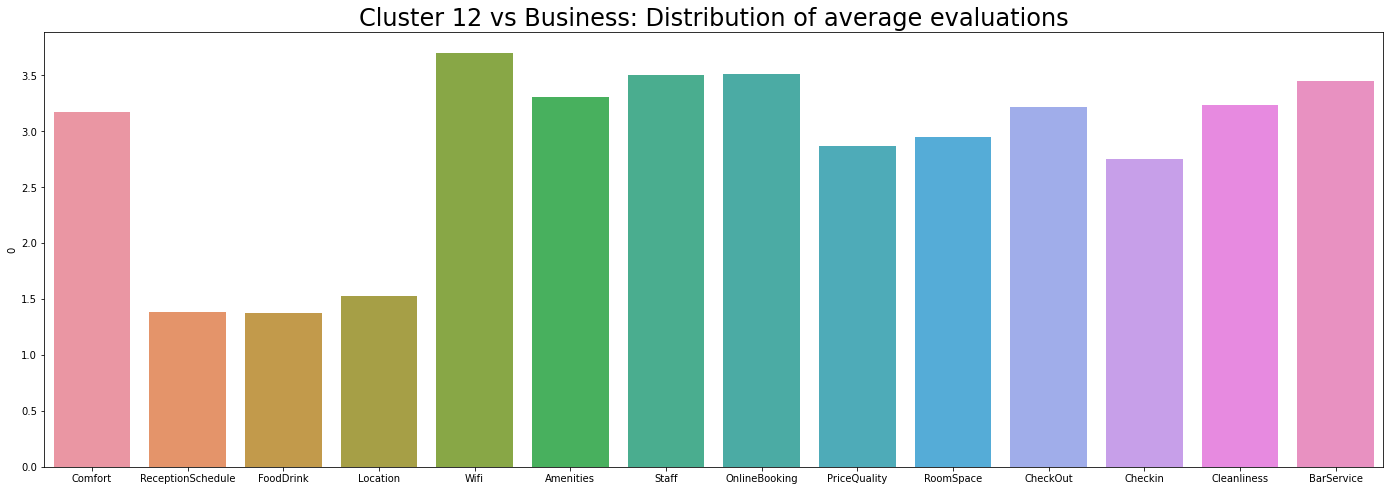

In [22]:
figure = plt.figure(figsize=(24,8))
sns.barplot(mean_leisure.columns,mean_leisure.loc[0]).set_title('Cluster 12 vs Leisure: Distribution of average evaluations',fontdict= { 'fontsize': 24}) 
               
figure = plt.figure(figsize=(24,8))
sns.barplot(mean_business.columns,mean_business.loc[0]).set_title('Cluster 12 vs Business: Distribution of average evaluations',fontdict= { 'fontsize': 24}) 

**DESCRIPTION** (769 reviews)

    Average Age -> 44 anos
    Lower Reviews -> Comfort (2.15) | FoodDrink (1.65) | Amenities (2.17)
    
**CLUSTER 12 (Leisure)** (627 reviews)
    
    Lower Reviews -> Comfort (1.92) | FoodDrink (1.71) | Amenities (1.93)
    
**CLUSTER 12 (Business)** (142 reviews)
    
    Lower Reviews -> ReceptionSchedule (1.37) | FoodDrink (1.36) | Location (1.51)
    
    

__Table:__ _CLUSTER 00 - 12 RESULTS_

| Label   | Longevity | TypeTrave| Age | Amount of Reviews | Lowest Evaluations                                               |
|---------|-----------|----------|-----|-------------------|------------------------------------------------------------------|
| **00**  |           |          | 37  | **2155**          | **BarService (2.04) - OnlineBooking (2.01) - Wifi (2.16)**       |
| 00      | No        | Business | 32  | 1285              | BarService (1.94) - OnlineBooking (1.96) - Wifi (1.96)           |
| 00      | Yes       | Business | 43  | 870               | BarService (2.18) - OnlineBooking (2.09) - Comfort (2.06)        |
| **02**  |           |          | 44  | **2174**          | **BarService (2.08) - OnlineBooking (2.02) - Wifi (2.12)**       |
| 02      | Yes       | Leisure  | 44  | 1293              | BarService (2.01) - OnlineBooking (1.96) - Wifi (1.98)           |
| 02      | Yes       | Business | 44  | 881               | BarService (2.20) - OnlineBooking (2.09) - Comfort (2.07)        |
|---------|-----------|----------|-----|-------------------|------------------------------------------------------------------|
| **10**  |           |          | 34  | **934**           | **Comfort (2.15) - ReceptionSchedule (1.59) - FoodDrink (1.81)** | 
| 10      | No        | Business | 31  | 781               | Comfort (1.96) - ReceptionSchedule (1.63) - FoodDrink (1.90)     |
| 10      | Yes       | Business | 44  | 153               | ReceptionSchedule (1.36) - FoodDrink (1.38) - Location (1.55)    |
| **12**  |           |          | 44  | **769**           | **Comfort (2.15) - FoodDrink (1.65) - Amenities (2.17)**         | 
| 12      | Yes       | Leisure  | 44  | 627               | Comfort (1.92) - FoodDrink (1.71) - Amenities (1.93)             |
| 12      | Yes       | Business | 44  | 142               | ReceptionSchedule (1.37) - FoodDrink (1.36) - Location (1.51)    |

Also, there is a moderate correlation between:
* Churn + Business -> Female
* Churn + Leisure -> Male
